# **PROYECTO INTEGRADOR DE DOMINIO AUTÓNOMO (PIDA)**
---


*The Learning Gate*
*   NOMBRE DEL PARTICIPANTE: Evelyn Aylin Rendon Medina
*   PROYECTO: Ventas Panattella
*   TRAYECTORIA: Citizen Data Scientist
*   TIPO APRENDIZAJE / DOMINIO APLICACIÓN: Educación continua


---
`PROPÓSITO DE LA CERTIFICACIÓN:` Evaluar, mediante un proyecto que el conjunto de competencias adquiridas en el programa de entrenamiento genere en la organización y/o persona, un impacto de mejora medible, claramente estructurado y autogestionado por parte del participante.

## **ETAPA I:** Entendimiento del negocio
Esta etapa consiste en definir el alcance del proyecto, considerando los objetivos comerciales, para evaluar con mayor precisión el impacto del proyecto en la empresa/organización.


* **Antecedentes:** ¿En qué empresa/organización se desarrolla el proyecto? ¿Cuál o cuáles son los proceso o procesos de negocios que serán impactados por el mismo?

* **Formulación del problema:** ¿Qué es lo que se intenta resolver?

* **Valor agregado:** ¿Por qué es importante resolver este problema?

* **Objetivos:** ¿Cuál es la meta prevista? ¿Cuál(es) es(son) los criterios de éxito?


* **Diccionario de datos:** ¿Qué representa cada variable?


* **Predictores y respuesta:** ¿Cuáles son las entradas y la(s) salida(s)?

---

## **ETAPA II:** Entendimiento de los datos

Esta etapa consiste en la ingestión o recopilación de los datos y su exploración, mediante estadísticas descriptiva e inferencial y visualizaciones concluyentes.


### Librerías

In [1]:
# Inclusión de las bibliotecas necesarias
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from openpyxl import load_workbook
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.utils import get_column_letter

C:\Users\PROPIETARIO\AppData\Local\Temp\ipykernel_18868\1735712501.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Identificación de los drivers para conexión a SQL Server
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'ODBC Driver 11 for SQL Server',
 'ODBC Driver 13 for SQL Server',
 'CAMWorks SQLite3 ODBC Driver',
 'MySQL ODBC 8.1 ANSI Driver',
 'MySQL ODBC 8.1 Unicode Driver',
 'Oracle en OraDB21Home1',
 'Oracle in XE',
 'ODBC Driver 17 for SQL Server',
 'ODBC Driver 18 for SQL Server',
 'Microsoft Access Driver (*.mdb, *.accdb)',
 'Microsoft Excel Driver (*.xls, *.xlsx, *.xlsm, *.xlsb)',
 'Microsoft Access Text Driver (*.txt, *.csv)',
 'Microsoft Access dBASE Driver (*.dbf, *.ndx, *.mdx)']

In [3]:
# Conexión | Lectura
server = 'localhost'
database = 'master'
driver = '{ODBC Driver 17 for SQL Server}'
#print(pyodbc.drivers())

# Conexión | Windows Authentication
connection_string = f"""
DRIVER={driver};
SERVER={server};
DATABASE={database};
Trusted_Connection=yes;
TrustServerCertificate=yes;
"""

# Conexión | Consulta
conn = pyodbc.connect(connection_string)
query = '''
SELECT VENTA, CURRENT_ARTIC ARTICULO, DESCRIP, CNT_PRODS_VENTA, TIPO_DOC, DIAS, VEND,
CASE WHEN UNIDAD LIKE 'BULTO%' THEN 'BULTO(S)' ELSE UNIDAD END UNIDAD,
CASE WHEN LAST_ARTIC<>CURRENT_ARTIC THEN ROUND((LAST_CANTIDAD*44)/25,0) ELSE ROUND(LAST_CANTIDAD,0) END CANTIDAD,
CASE WHEN LAST_ARTIC<>CURRENT_ARTIC THEN 
	ROUND(((LAST_CANTIDAD*LAST_PRECIO)/(LAST_CANTIDAD*44))*25,4) ELSE LAST_PRECIO END PRECIO,
F_EMISION
FROM (SELECT VENTA, ARTICULO LAST_ARTIC, /*DESCRIP,*/ UNIDAD, CANTIDAD LAST_CANTIDAD, PRECIO LAST_PRECIO, F_EMISION,
CNT_PRODS_VENTA, TIPO_DOC, DIAS, VEND,
CASE UPPER(ARTICULO)
    WHEN 'HA-08' THEN 'HA-008'
    WHEN 'HA-02' THEN 'HA-002'
    WHEN 'HA-04' THEN 'HA-004'
    WHEN 'HA-03' THEN 'HA-003'
    WHEN 'HA-11' THEN 'HA-011'
    WHEN 'HA-05' THEN 'HA-005'
    WHEN 'HA-06' THEN 'HA-006'
    WHEN 'HA-07' THEN 'HA-007'
    WHEN 'HA-10' THEN 'HA-010'
    WHEN 'HA-09' THEN 'HA-009'
    ELSE UPPER(ARTICULO)
END AS CURRENT_ARTIC,
CASE UPPER(ARTICULO)
    WHEN 'HA-08' THEN 'HARINA XALEY AP 25 KILOS'
    WHEN 'HA-02' THEN 'HARINA ESMERALDA 25 KGS'
    WHEN 'HA-04' THEN 'HARINA ESMERALDA AP 25 KGS'
    WHEN 'HA-03' THEN 'HARINA TRECE 25 KGS'
    WHEN 'HA-11' THEN 'HARINA VIRGINIA 25 KGS'
    WHEN 'HA-05' THEN 'HARINA ESPIGA 25 KGS'
    WHEN 'HA-06' THEN 'HARINA SELECTA 25 KGS'
    WHEN 'HA-07' THEN 'HARINA SELECTA AP 25 KGS'
    WHEN 'HA-10' THEN 'HARINA MEDALLA DE ORO 25KGS'
    WHEN 'HA-09' THEN 'HARINA GUADALUPANA 25 KGS'
    ELSE UPPER(DESCRIP)
 END AS DESCRIP 
FROM master.dbo.Ventas
WHERE UPPER(ARTICULO) IN ('GV-01','AC-02','HA-008','HA-02','HA-002','HA-004','HA-03','HA-003','HA-11'
,'HA-011','HA-005','HA-006','HA-007','HA-010','HA-009','ES-07','ES-02','ES-03','ES-04','ES-05'
,'GV-COL','ES-08','AC-03','SP-01','SP-11','SP-09','ES-09','AC-MAR','FARDO-TRIGO')) A
'''
original_df = pd.read_sql(query, conn)

conn.close()


C:\Users\PROPIETARIO\AppData\Local\Temp\ipykernel_18868\2807527361.py:58: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  original_df = pd.read_sql(query, conn)


Conexión a SQL server consultando solamente los datos relevantes, dispuestos en el diccionario presentado
Cabe destacar que se realiza un preprocesamiento de los artículos definidos cuyo tamaño de empaque cambió de 44kg a 25kg, donde se ajusta la cantidad equivalente y unifican las etiquetas a las actuales.

In [4]:
# Muestra

original_df.head()

VENTA ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  \
0  206506.0   HA-007  HARINA SELECTA AP 25 KGS              3.0      REM   
1  206506.0   HA-005      HARINA ESPIGA 25 KGS              3.0      REM   
2  206506.0   GV-COL        GRASA COLON 24 KGS              3.0      REM   
3  206507.0   HA-003       HARINA TRECE 25 KGS              1.0      REM   
4  206508.0   HA-007  HARINA SELECTA AP 25 KGS              2.0      REM   

   DIAS VEND    UNIDAD  CANTIDAD  PRECIO   F_EMISION  
0  30.0  MGP  BULTO(S)      35.0   390.0  20251028.0  
1  30.0  MGP  BULTO(S)      15.0   400.0  20251028.0  
2  30.0  MGP      CAJA       4.0   830.0  20251028.0  
3  30.0   LS  BULTO(S)     100.0   390.0  20251028.0  
4  30.0  PMC  BULTO(S)     100.0   380.0  20251028.0

Las siguientes son algunas de las preguntas comunes que se pueden abordar a través de un análisis exploratorio de datos:
* ¿Cuál es la dimensionalidad del conjunto de datos?
* ¿Qué tipo de datos tienen las variables?
* ¿Hay valores faltantes en el conjunto de datos?
* ¿Cuáles son las estadísticas resumidas del conjunto de datos?
* ¿Cuál es la cardinalidad de las variables categóricas?

In [5]:
# ¿Cuál es la dimensionalidad del conjunto de datos?

#original_df.shape
print('Columnas: ', original_df.shape[1], '\nRegistros: ', original_df.shape[0])


Columnas:  11 
Registros:  88733


Se mantienen solamente 9 columnas relevantes. En registros, limitando el set de datos a solo productos activos, se disponen 88,733

In [6]:
# ¿Qué tipo de datos tienen las variables?

original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88733 entries, 0 to 88732
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VENTA            88733 non-null  float64
 1   ARTICULO         88733 non-null  object 
 2   DESCRIP          88733 non-null  object 
 3   CNT_PRODS_VENTA  88733 non-null  float64
 4   TIPO_DOC         88733 non-null  object 
 5   DIAS             88733 non-null  float64
 6   VEND             88733 non-null  object 
 7   UNIDAD           88733 non-null  object 
 8   CANTIDAD         88733 non-null  float64
 9   PRECIO           88733 non-null  float64
 10  F_EMISION        88733 non-null  float64
dtypes: float64(6), object(5)
memory usage: 7.4+ MB


Se observa que se interpretan de forma incorrecta algunos de los tipos de datos en las variables. Por ejemplo, la venta es un identificador y se identifica como tipo de dat flotante
Por tanto, en el siguiente paso se realizará el ajuste al tipo esperado de datos

In [7]:
# Ajuste el tipo de datos esperado

df = original_df.copy()

dtype_mapping = {
    'VENTA': 'Int64',
    'ARTICULO': 'string',
    'DESCRIP': 'string',
    'UNIDAD': 'string',
    'CNT_PRODS_VENTA': 'Int64',
    'TIPO_DOC': 'string',
    'CANTIDAD': 'Int64',
    'PRECIO': 'float64',
    'DIAS': 'Int64'
    #'F_EMISION': 'string', # Procesado abajo
}

df = df.astype(dtype_mapping)
df = df.drop('VENTA', axis=1)
# Con base en la retroalimentación, se elimina la variable de venta

# Formato de fecha
date_cols = ['F_EMISION']
for col in date_cols:
    df[col] = pd.to_datetime(df[col].dropna().astype(int).astype(str), format='%Y%m%d', errors='coerce')

df.dtypes

ARTICULO           string[python]
DESCRIP            string[python]
CNT_PRODS_VENTA             Int64
TIPO_DOC           string[python]
DIAS                        Int64
VEND                       object
UNIDAD             string[python]
CANTIDAD                    Int64
PRECIO                    float64
F_EMISION          datetime64[ns]
dtype: object

Comprobamos que el conteo de productos por venta, cantidad vendida y días ahora se manejan como enteros. Por otro lado, artículo, descripción y tipo de documento son cadenas de texto
Finalmente, el precio es un valor flotante y la fecha se reconoce como fecha

In [8]:
# Revisión del ajuste

df.head()

ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS VEND  \
0   HA-007  HARINA SELECTA AP 25 KGS                3      REM    30  MGP   
1   HA-005      HARINA ESPIGA 25 KGS                3      REM    30  MGP   
2   GV-COL        GRASA COLON 24 KGS                3      REM    30  MGP   
3   HA-003       HARINA TRECE 25 KGS                1      REM    30   LS   
4   HA-007  HARINA SELECTA AP 25 KGS                2      REM    30  PMC   

     UNIDAD  CANTIDAD  PRECIO  F_EMISION  
0  BULTO(S)        35   390.0 2025-10-28  
1  BULTO(S)        15   400.0 2025-10-28  
2      CAJA         4   830.0 2025-10-28  
3  BULTO(S)       100   390.0 2025-10-28  
4  BULTO(S)       100   380.0 2025-10-28

In [9]:
# ¿Hay valores faltantes en el conjunto de datos?

df.isnull().sum()

ARTICULO           0
DESCRIP            0
CNT_PRODS_VENTA    0
TIPO_DOC           0
DIAS               0
VEND               0
UNIDAD             0
CANTIDAD           0
PRECIO             0
F_EMISION          0
dtype: int64

Para el set de datos limitado a las variables de interés y solo productos activos, no se cuenta con ningún valor faltante

In [10]:
# ¿Cuáles son las estadísticas resumidas del conjunto de datos?

df.describe()

CNT_PRODS_VENTA       DIAS    CANTIDAD        PRECIO  \
count          88733.0    88733.0     88733.0  88733.000000   
mean          3.273179  22.036762  138.016172    315.884850   
min                1.0        0.0         1.0      0.000000   
25%                1.0        0.0        20.0    196.022700   
50%                1.0       30.0        88.0    243.506500   
75%                3.0       30.0       176.0    410.000000   
max               51.0      120.0     35552.0  10000.000000   
std           5.529419  18.578752  271.792082    181.172585   

                           F_EMISION  
count                          88733  
mean   2018-11-26 10:19:29.341732864  
min              2002-07-30 00:00:00  
25%              2014-10-09 00:00:00  
50%              2020-04-05 00:00:00  
75%              2023-01-16 00:00:00  
max              2025-10-28 00:00:00  
std                              NaN

Es posible observar que en promedio, cada venta contiene alrededor de tres productos, un lógico mínimo de uno y un máximo de 51. El valor máximo podría ser un valor atípico o incluso un error, lo cual se verficará posteriomente
Por otro lado, por transacción se vende un promedio de 138 unidades. Esto puede no ser propiamente representativo, ya que se mezclan unidades de medida, que suelen tener diferentes volúmenes de venta, lo que podría sesgar nuestra interpretación. Sucede algo similar con el precio, aunque 315 podría sonar medianamente congruente con los precios de los bultos, sabemos que debe estar sesgado por los demás productos de precios inferiores
Por otro lado, los registros comienzan desde 2002 y se tiene una fotografía hasta el 28 de octubre del 2025

In [11]:
# ¿Cuál es la cardinalidad de las variables categóricas?

print('Productos únicos: ', len(df['ARTICULO'].unique()), '\n', df['ARTICULO'].unique().tolist())
print('Unidades de medida: ', len(df['UNIDAD'].unique()), '\n', df['UNIDAD'].unique().tolist())

Productos únicos:  26 
 ['HA-007', 'HA-005', 'GV-COL', 'HA-003', 'SP-09', 'HA-002', 'HA-004', 'HA-011', 'HA-006', 'SP-01', 'AC-MAR', 'ES-03', 'ES-08', 'HA-009', 'GV-01', 'HA-010', 'ES-09', 'FARDO-TRIGO', 'AC-03', 'ES-02', 'AC-02', 'ES-07', 'HA-008', 'ES-04', 'ES-05', 'SP-11']
Unidades de medida:  5 
 ['BULTO(S)', 'CAJA', 'BIDON', 'CAJA(S)', 'UNIDAD']


Las categorías en este caso, podrían manejarse a nivel producto, que sería el más granular. En este caso, se tienen 26 diferentes. Alternativamente, podríamos la unidad de medida sería una categoría con menor nivel de detalle, de las cuales existen 7

In [12]:
# Ventas por producto

cntVentas= df.groupby(['ARTICULO','DESCRIP'])['CANTIDAD'].sum().sort_values(ascending=False).reset_index()
cntVentas

ARTICULO                           DESCRIP  CANTIDAD
0        HA-002           HARINA ESMERALDA 25 KGS   5770123
1        HA-003               HARINA TRECE 25 KGS   4630990
2        HA-011            HARINA VIRGINIA 25 KGS    591120
3   FARDO-TRIGO  FARDO DE HARINA "LAZIALI" 10 KGS    504567
4         GV-01                 GRASA JEFA 24 KGS    269453
5        HA-007          HARINA SELECTA AP 25 KGS    147441
6        HA-005              HARINA ESPIGA 25 KGS    105762
7        HA-004        HARINA ESMERALDA AP 25 KGS     93154
8        HA-006             HARINA SELECTA 25 KGS     36878
9         AC-02             ACEITE ESTAMPA 20 LTS     29296
10       HA-009         HARINA GUADALUPANA 25 KGS     21402
11        SP-01                      GRANO 25 KGS     13730
12        ES-07                HARINA ESCUDO PLUS     10721
13        SP-09                     SALVADO 25 KG      9152
14       GV-COL                GRASA COLON 24 KGS      6524
15        ES-09                 MIX MUERTO 20 KGS      1054
16        ES-03               RICHCREME CHOCOLATE       940
17       AC-MAR            ACEITE MARAVILLA 20LTS       843
18       HA-010       HARINA MEDALLA DE ORO 25KGS       840
19        ES-02                RICHCREME VAINILLA       808
20       HA-008          HARINA XALEY AP 25 KILOS       714
21        SP-11                     SALVADO 30 KG       389
22        AC-03  ACEITE MARCA LA NIÃ‘A DE 20 LTS.       363
23        ES-08            RICHCREME PIÃ‘A COLADA       294
24        ES-04                       MIX ESPONJA        25
25        ES-05                        RED VELVET         6

Se obtiene solamente de manera informativa las ventas en cantidad realizadas por producto. El resultado obtenido es congruente con el comportamiento observado

Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder:

* ¿Hay valores atípicos?
* ¿Existen distribuciones sesgadas en el conjunto de datos?
* ¿Cómo se distribuyen los datos en función de diferentes categorías?
* ¿Hay correlación entre las variables dependientes e independientes?
* ¿Hay desequilibrio en las clases de la variable objetivo?

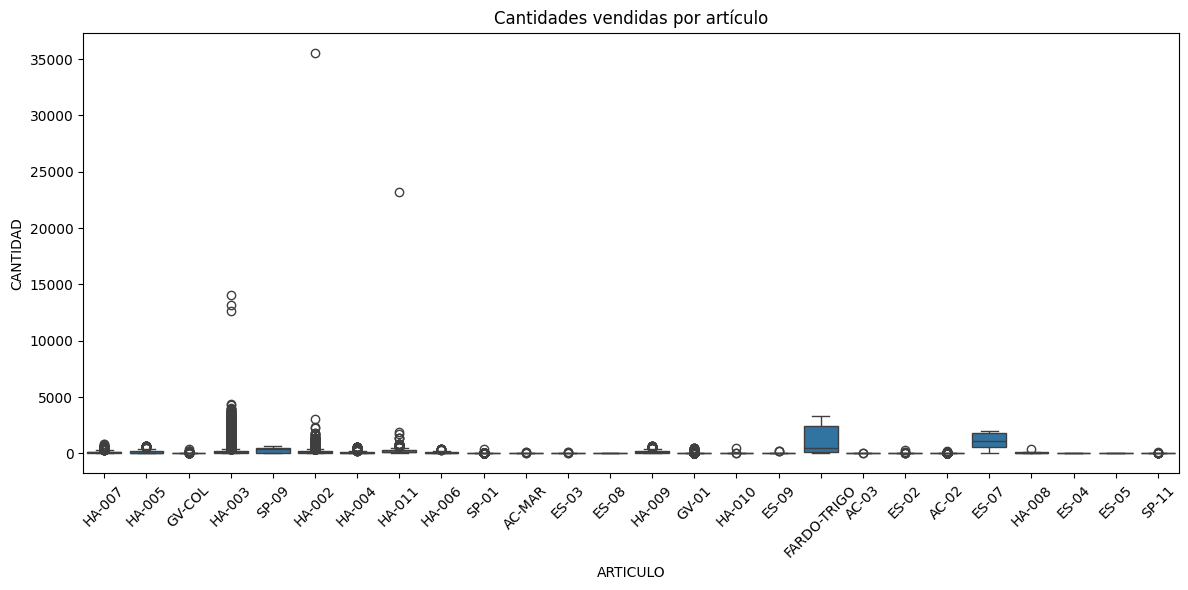

In [13]:
# ¿Hay valores atípicos?

plt.figure(figsize=(12, 6))
sns.boxplot(x='ARTICULO', y='CANTIDAD', data=df)
plt.title('Cantidades vendidas por artículo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observan valores atípicos en la mayoría de los productos, sobre todo los más vendidos. Los más notorio son en el producto HA-002 y HA-011, que incluso disminuyen la amplitud de las demás cajas

In [14]:
df.select_dtypes(include='number').corr()

CNT_PRODS_VENTA      DIAS  CANTIDAD    PRECIO
CNT_PRODS_VENTA         1.000000 -0.106338 -0.108392  0.133920
DIAS                   -0.106338  1.000000  0.131411 -0.027935
CANTIDAD               -0.108392  0.131411  1.000000 -0.189473
PRECIO                  0.133920 -0.027935 -0.189473  1.000000

### AUTOEDA

In [15]:
# ¿Existen distribuciones sesgadas en el conjunto de datos?
# ¿Cómo se distribuyen los datos en función de diferentes categorías?
# ¿Hay correlación entre las variables dependientes e independientes?
# ¿Hay desequilibrio en las clases de la variable objetivo?

pandas_report = ProfileReport(df)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 34.28it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Los resultados obtenidos en el YData Profiling Report nos permiten ver valores numéricos complementarios a los obtenidos anteriormente, como también comprueba lo expresado por instrucciones específicas.

Por ejemplo, observamos la agrupación de las variables por tipos, ligeramente más desagregado que el detalle obtenido, pues divide en numéricas sin especificar el tipo particular. Por otro lado, podemos ver de forma sencilla en una misma tabla las estadísticas del set de datos, donde se confirma que no hay datos faltantes, que la dimensión de los datos coincide e incluso determina la cantidad de memoria empleada.

Cabe destacar que la variable días contiene una considerable cantidad de valores en cero, y hay también algunos presentes en el precio. Si bien esto puede ser considerado como un error, corresponden a bultos sin cargo que pueden darse como bonificación y ocasiones donde el acuerdo comercial dicta que la transacción se realizará sin crédito, pagando por tanto de contado.

Se ahondará en la interpretación de los resultados en el siguiente apartado.

In [16]:
# Hide unused axes
def hide_axes(i, axes, fig):
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

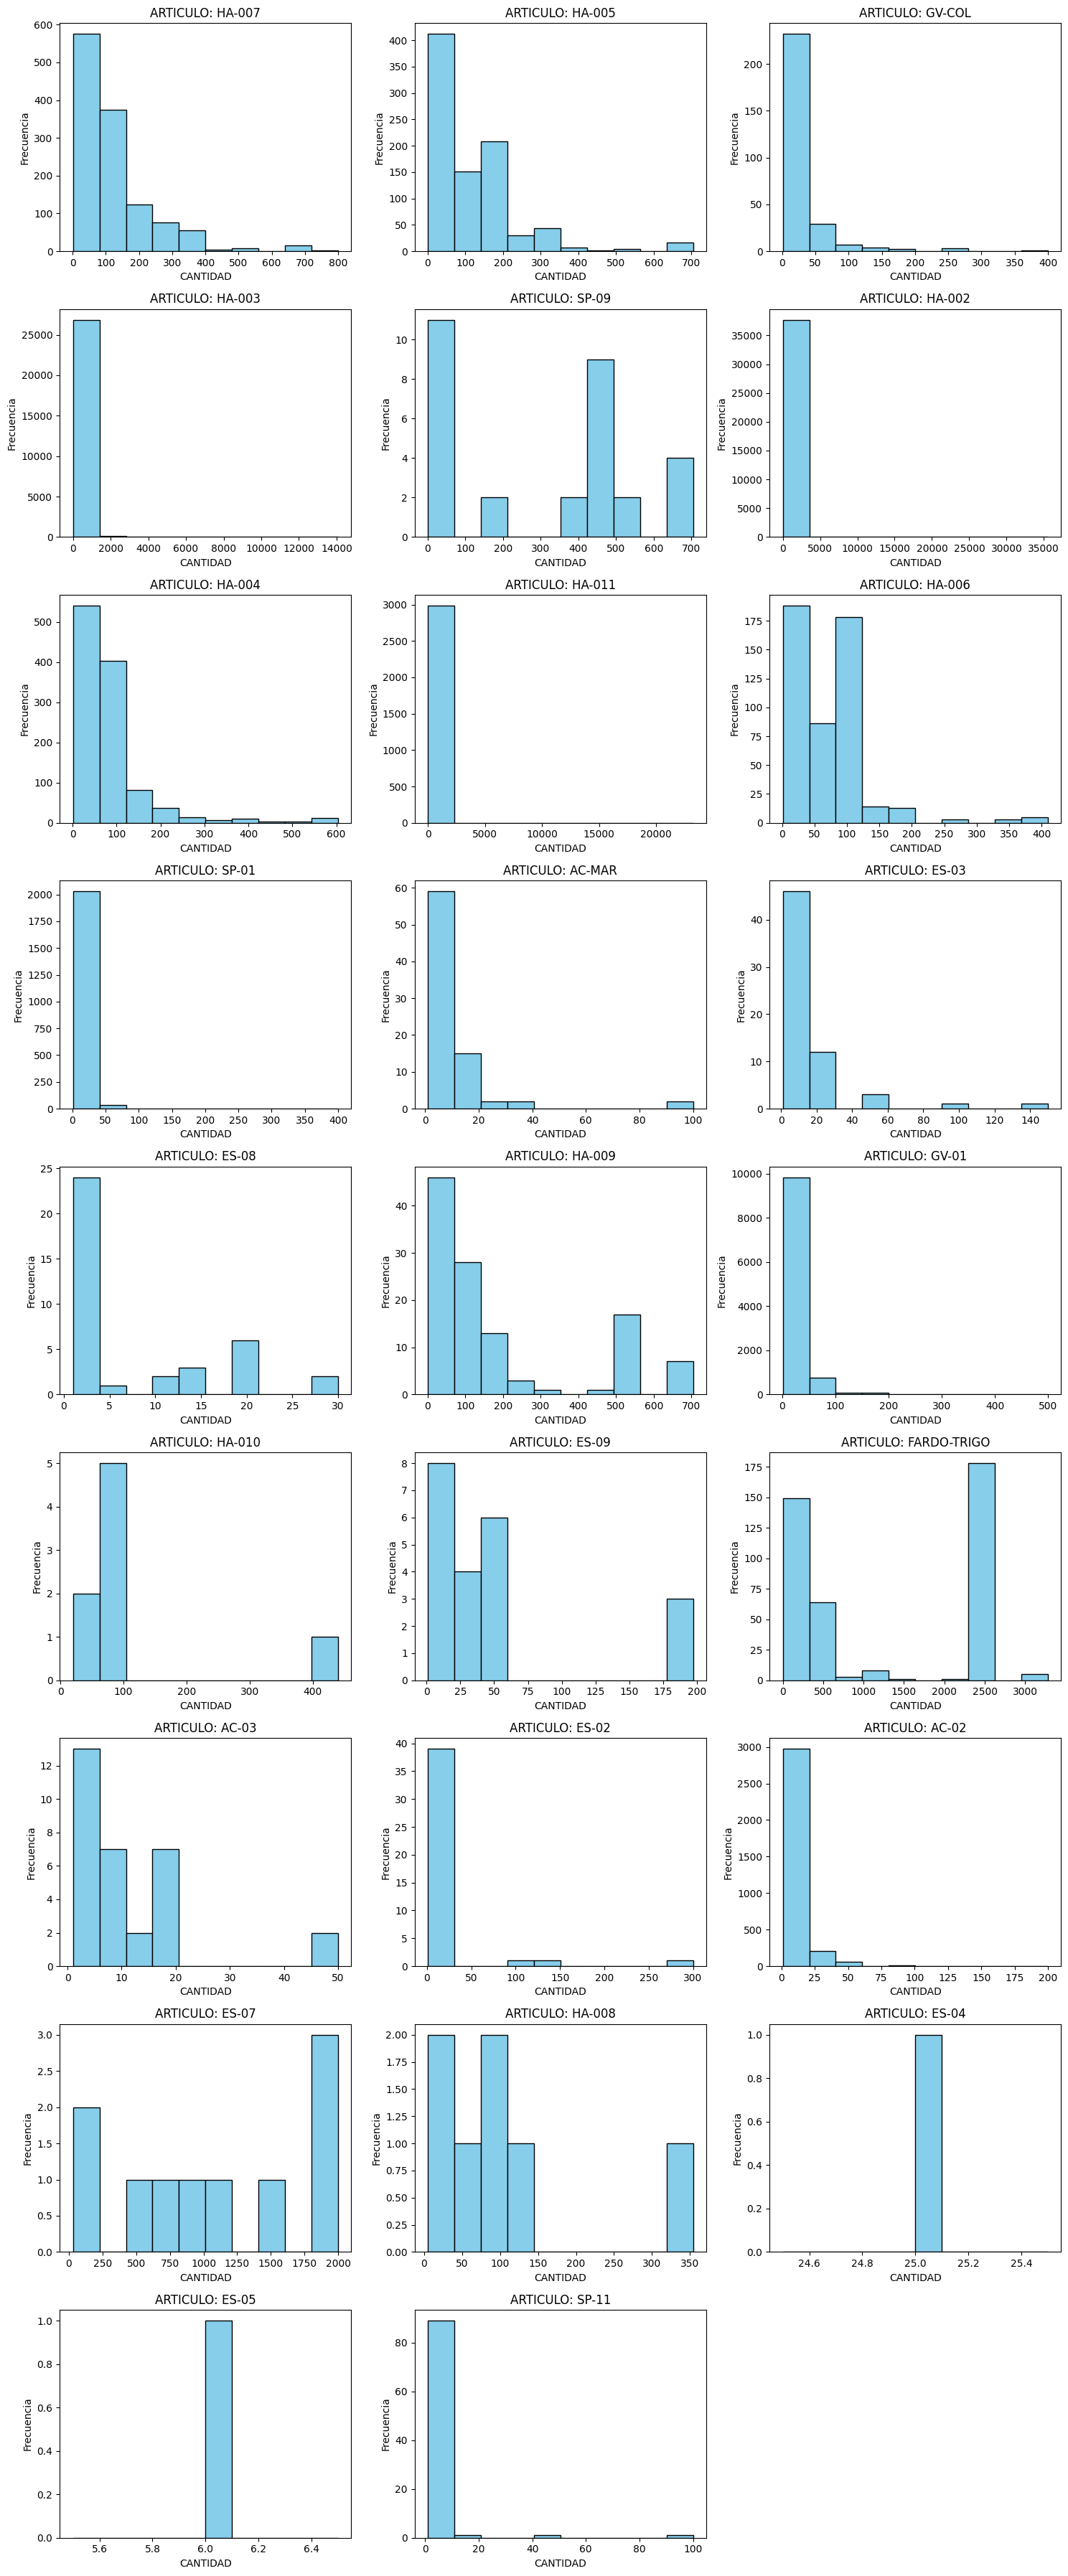

In [17]:
# ¿Existen distribuciones sesgadas en el conjunto de datos?
# ¿Cómo se distribuyen los datos en función de diferentes categorías?

articulos = df['ARTICULO'].unique()
n = len(articulos)

# Layout
cols = 3
rows = -(-n // cols)  # Ceiling division

# Subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Histogram
for i, articulo in enumerate(articulos):
    subset = df[df['ARTICULO'] == articulo]
    axes[i].hist(subset['CANTIDAD'], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'ARTICULO: {articulo}')
    axes[i].set_xlabel('CANTIDAD')
    axes[i].set_ylabel('Frecuencia')

hide_axes(i, axes, fig)
plt.tight_layout()
plt.show()

De forma complementaria, se obtiene un histograma por producto, donde no se visualizan comportamientos típicamente normales por categoría de producto

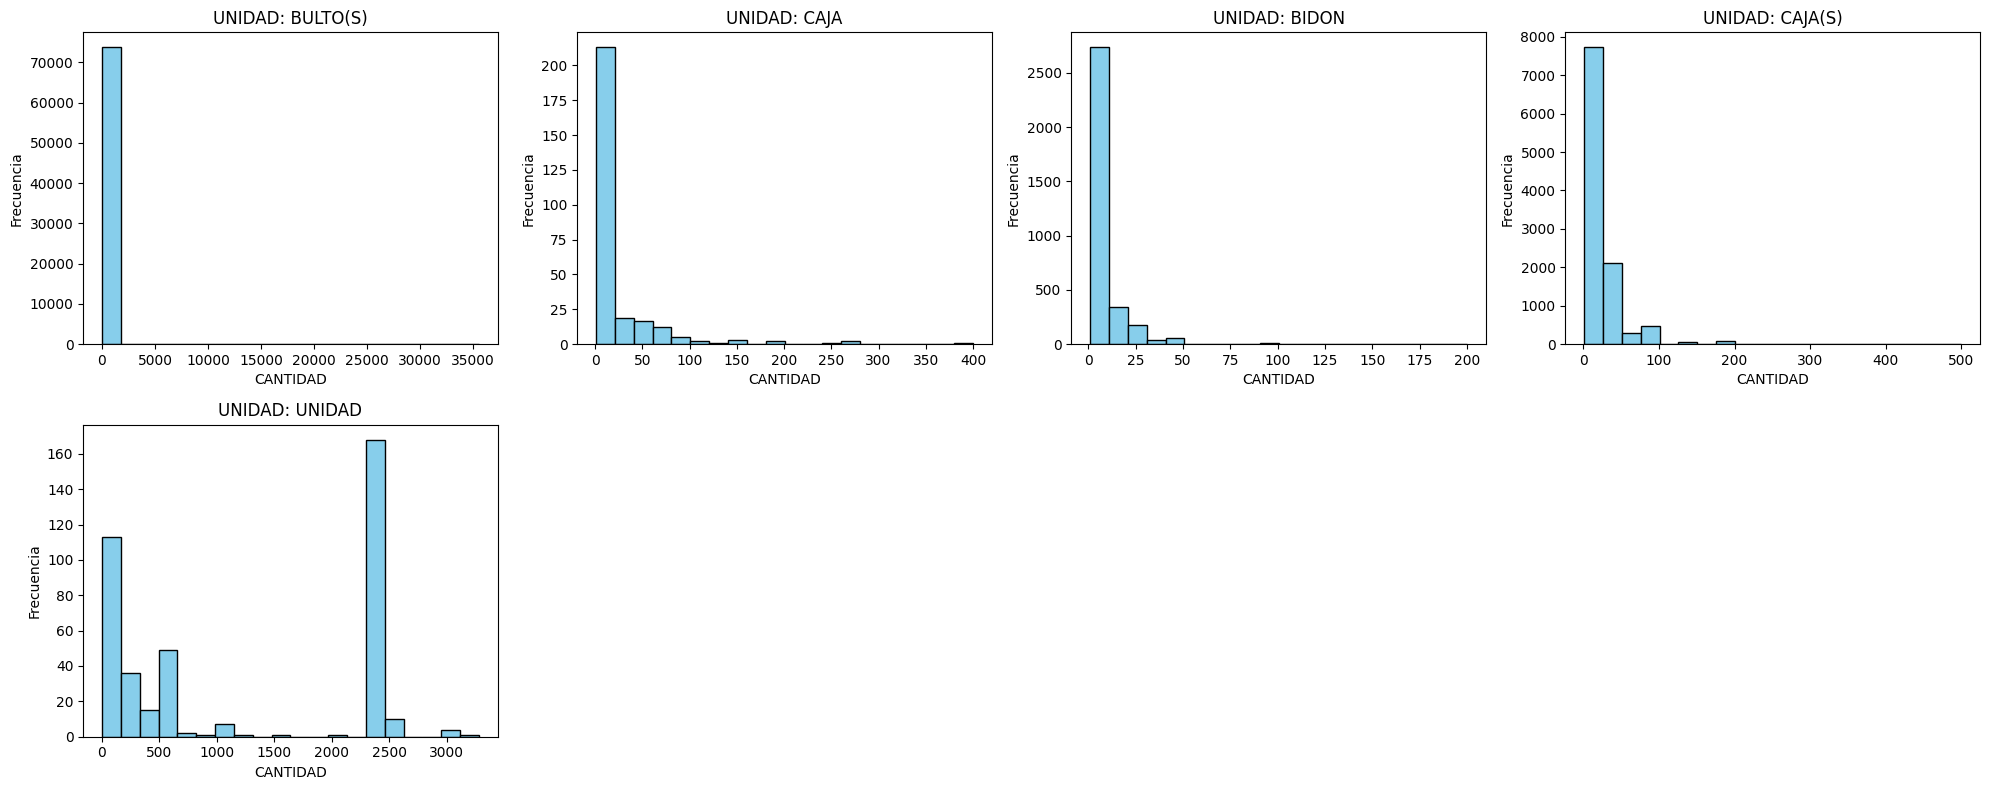

In [18]:
# ¿Existen distribuciones sesgadas en el conjunto de datos?
# ¿Cómo se distribuyen los datos en función de diferentes categorías?

unidades = df['UNIDAD'].unique()
n2 = len(unidades)

# Layout
cols = 4
rows = -(-n2 // cols)  # Ceiling division

# Subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Histogram
for i, unidad in enumerate(unidades):
    subset = df[df['UNIDAD'] == unidad]
    axes[i].hist(subset['CANTIDAD'], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'UNIDAD: {unidad}')
    axes[i].set_xlabel('CANTIDAD')
    axes[i].set_ylabel('Frecuencia')

hide_axes(i, axes, fig)
plt.tight_layout()
plt.show()

In [19]:
df.head()

ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS VEND  \
0   HA-007  HARINA SELECTA AP 25 KGS                3      REM    30  MGP   
1   HA-005      HARINA ESPIGA 25 KGS                3      REM    30  MGP   
2   GV-COL        GRASA COLON 24 KGS                3      REM    30  MGP   
3   HA-003       HARINA TRECE 25 KGS                1      REM    30   LS   
4   HA-007  HARINA SELECTA AP 25 KGS                2      REM    30  PMC   

     UNIDAD  CANTIDAD  PRECIO  F_EMISION  
0  BULTO(S)        35   390.0 2025-10-28  
1  BULTO(S)        15   400.0 2025-10-28  
2      CAJA         4   830.0 2025-10-28  
3  BULTO(S)       100   390.0 2025-10-28  
4  BULTO(S)       100   380.0 2025-10-28

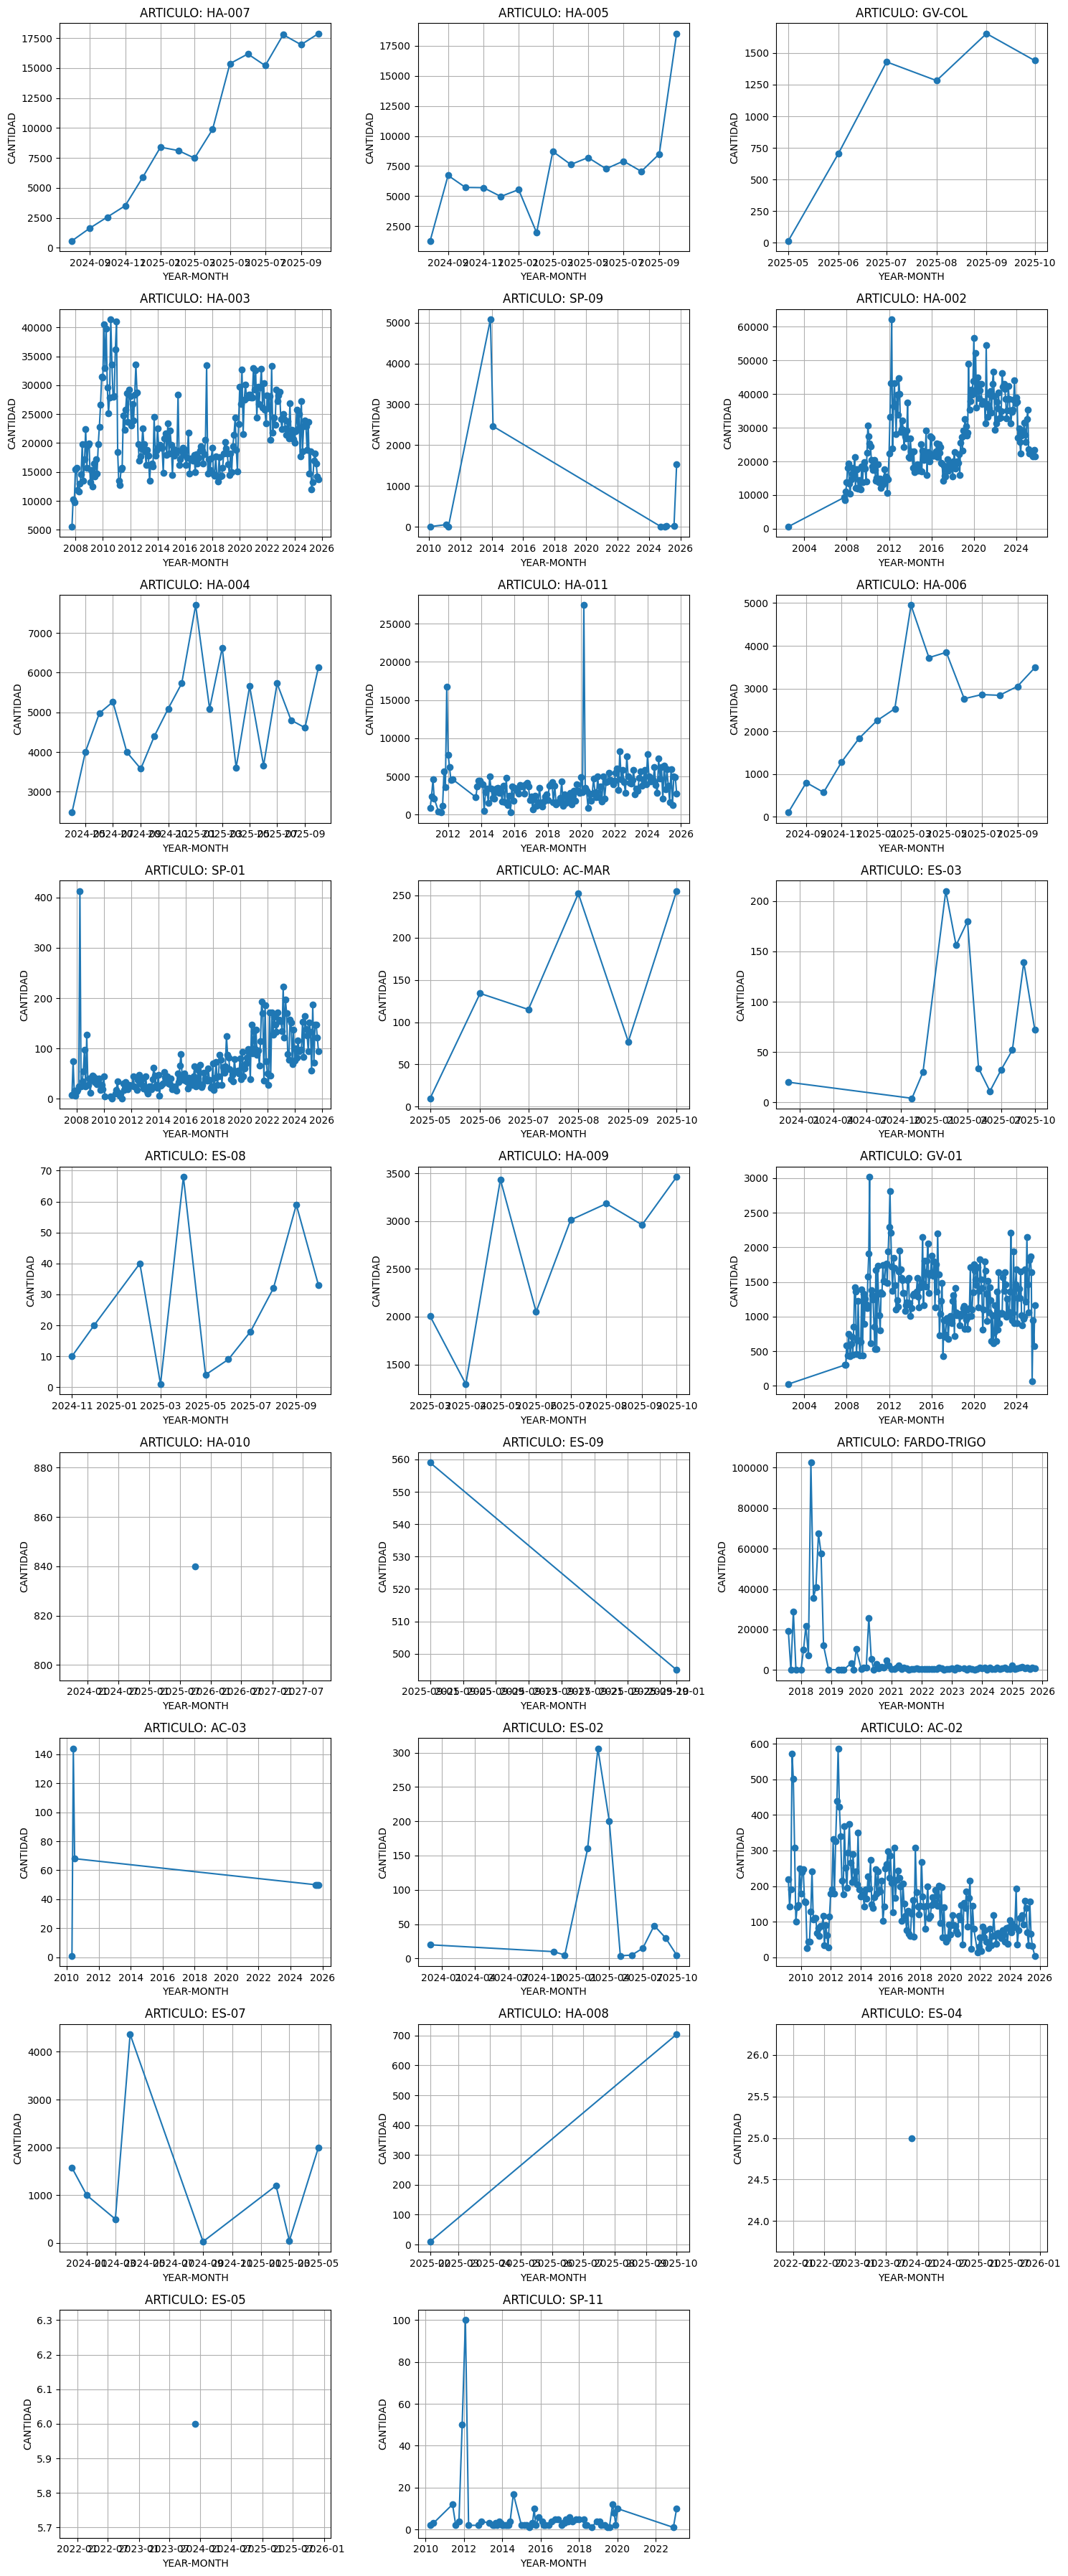

In [20]:
# Series de tiempo

# YEAR-MONTH
df['YEAR_MONTH'] = df['F_EMISION'].dt.to_period('M').dt.to_timestamp()
#articulos = df['ARTICULO'].unique()
n3 = len(articulos)

# Layout
cols = 3
rows = -(-n3 // cols)  # Ceiling division

# Subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot for each ARTICULO
for i, articulo in enumerate(articulos):
    subset = (
        df[df['ARTICULO'] == articulo]
        .groupby('YEAR_MONTH')['CANTIDAD']
        .sum()
        .reset_index())

    axes[i].plot(subset['YEAR_MONTH'], subset['CANTIDAD'], marker='o')
    axes[i].set_title(f'ARTICULO: {articulo}')
    axes[i].set_xlabel('YEAR-MONTH')
    axes[i].set_ylabel('CANTIDAD')
    axes[i].grid(True)


hide_axes(i, axes, fig)
plt.tight_layout()
plt.show()


Por unidad de medida se observa en la mayoría de los casos sesgo hacia la derecha, mientras que la frecuencia se anida en el primer bin. Lo anterior no es aplicable para la unidad en sí o piezas, que tiene un comportamiento relativamente bimodal

**CONCLUSIONES:** ¿Cuáles son los hallazgos más importantes del análisis exploratorio de datos?

Tras llevar a cabo el análisis exploratorio se puede detectar que el conjunto de datos es considerablemente pequeño, sobre todo en columnas o variables que ayuden al modelo a detectar patrones que le permitan predecir las ventas por mes. Por tanto, en la siguiente fase de preparación de los datos será indispensable crear características de valor que ayuden a capturar el comportamiento.

Por otro lado, se observan valores atípicos en la mayoría de los productos y, sobre todo en los más vendidos. Un ejemplo muy sobrealiento aparece en el producto HA-002, que indica una venta alrededor de los 35,000 bultos, lo cual parece inverosímil y habrá que procesarse para evitar un ajuste incorrecto en el modelo.
Además, el análisis también permitió definir que el producto más vendido es el HA-002, seguido del HA-003 y en tercer lugar el GV-01. Cuarto y quinto tienen valores parecidos, e incluso el acumulado de otros productos es mayor que el de ambos. Es decir, los dos primeros lugares en ventas los ocupa la harina, mientras que el tercero es grasa.

Adicionalmente, sabemos ahora que el promedio de productos por venta es de tres distintos. Es decir, que de lo anterior se podría especular que el comportamiento de la mayoría de los clientes, el cual consiste en solicitar dos harinas diferentes (probablemente el top) y acompañar el pedido con grasa.

Respecto al conteo de artículos, se observa el top de productos con mayor frecuencia, lo cual tiene sentido con el comportamiento. La descripción al ir de la mano del producto presenta un comportamiento paralelo. Lo anterior también se visualiza a través de la variable de unidad, donde son los bultos de harina los registros más frecuentes

Si se observa la cantidad de productos por venta, se aprecia sesgada hacia la derecha. Similar ocurre con precio, aunque en los primeros bines tenía una tendencia normal. Finalmente, la fecha de emisión se encuentra sesgada hacia la izquierda, aunque la frecuencia es mayor en las fechas más recientes.

Además, observamos sin duda que las clases están desbalanceadas, tanto si lo vemos por marca o productos distintos, como también por sus unidades de medida. Las harinas, cuya unidad es bulto poseen ventas muy superiores a las cajas, bidones y unidades o piezas. Por tanto, es vital contemplar o por ello se designa hacer la predicción por producto.

Finalmente, no parece haber una correlación realmente distintiva entre las variables, más allá de lo lógico, como lo es descripción con unidad y artículo. Cabe destacar que, si bien se toma la variable descripción para tener más contexto durante el análisis, no es una variable que se considerará en el modelo, pues no aporta valor predictivo.


---

## **ETAPA III:** Preparación de los datos

En esta etapa se aplican operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático.

El procesamiento puede incluir:
* Manejo de valores faltantes y atípicos
* Generación de nuevas características
* Discretización o binning
* Codificación
* Escalamiento
* Transformación

### Manejo de valores atípicos

In [21]:
# Identificar valores atípicos

# IQR
Q1 = df.groupby('ARTICULO')['CANTIDAD'].transform(lambda x: x.quantile(0.25))
Q3 = df.groupby('ARTICULO')['CANTIDAD'].transform(lambda x: x.quantile(0.75))
IQR = Q3 - Q1

# Thresholds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['CANTIDAD'] < lower) | (df['CANTIDAD'] > upper)]
print('Outliers: ', len(df[(df['CANTIDAD'] < lower) | (df['CANTIDAD'] > upper)]))
outliers.head()

Outliers:  6179


ARTICULO                    DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS  VEND  \
6    HA-002    HARINA ESMERALDA 25 KGS                1      FAC    45   PMC   
17   HA-002    HARINA ESMERALDA 25 KGS                1      FAC    45  CASA   
23   HA-005       HARINA ESPIGA 25 KGS                1      REM    45   MGP   
51   HA-007   HARINA SELECTA AP 25 KGS                1      REM    45   MGP   
52   HA-009  HARINA GUADALUPANA 25 KGS                1      REM    45   MGP   

      UNIDAD  CANTIDAD  PRECIO  F_EMISION YEAR_MONTH  
6   BULTO(S)       439   380.0 2025-10-28 2025-10-01  
17  BULTO(S)       528   426.0 2025-10-28 2025-10-01  
23  BULTO(S)       704   400.0 2025-10-28 2025-10-01  
51  BULTO(S)       704   380.0 2025-10-27 2025-10-01  
52  BULTO(S)       704   370.0 2025-10-27 2025-10-01

In [22]:
# Reemplazar valores atípicos

transformed_df = df.copy()
transformed_df['CANTIDAD'] = np.ceil(transformed_df['CANTIDAD']).astype(int).clip(lower=lower, upper=upper)

print('Outliers: ', len(transformed_df[(transformed_df['CANTIDAD'] < lower) | (transformed_df['CANTIDAD'] > upper)]))
transformed_df.head()


Outliers:  0


ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS VEND  \
0   HA-007  HARINA SELECTA AP 25 KGS                3      REM    30  MGP   
1   HA-005      HARINA ESPIGA 25 KGS                3      REM    30  MGP   
2   GV-COL        GRASA COLON 24 KGS                3      REM    30  MGP   
3   HA-003       HARINA TRECE 25 KGS                1      REM    30   LS   
4   HA-007  HARINA SELECTA AP 25 KGS                2      REM    30  PMC   

     UNIDAD  CANTIDAD  PRECIO  F_EMISION YEAR_MONTH  
0  BULTO(S)      35.0   390.0 2025-10-28 2025-10-01  
1  BULTO(S)      15.0   400.0 2025-10-28 2025-10-01  
2      CAJA       4.0   830.0 2025-10-28 2025-10-01  
3  BULTO(S)     100.0   390.0 2025-10-28 2025-10-01  
4  BULTO(S)     100.0   380.0 2025-10-28 2025-10-01

Nota: Algunas transformaciones se realizan desde la consulta, como ajuste en las etiquetas y la conversión a bultos de 25kg. Lo anterior fue identificado por medio del análisis exploratorio e iterado para obtener estadísticos representativos

### Generación de nuevas características

In [23]:
# Agregaciones por año y mes

transformed_df['YEAR'] = transformed_df['F_EMISION'].dt.year
transformed_df['MONTH'] = transformed_df['F_EMISION'].dt.month
transformed_df['YEAR_MONTH'] = transformed_df['F_EMISION'].dt.to_period('M')

transformed_df.head()

ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS VEND  \
0   HA-007  HARINA SELECTA AP 25 KGS                3      REM    30  MGP   
1   HA-005      HARINA ESPIGA 25 KGS                3      REM    30  MGP   
2   GV-COL        GRASA COLON 24 KGS                3      REM    30  MGP   
3   HA-003       HARINA TRECE 25 KGS                1      REM    30   LS   
4   HA-007  HARINA SELECTA AP 25 KGS                2      REM    30  PMC   

     UNIDAD  CANTIDAD  PRECIO  F_EMISION YEAR_MONTH  YEAR  MONTH  
0  BULTO(S)      35.0   390.0 2025-10-28    2025-10  2025     10  
1  BULTO(S)      15.0   400.0 2025-10-28    2025-10  2025     10  
2      CAJA       4.0   830.0 2025-10-28    2025-10  2025     10  
3  BULTO(S)     100.0   390.0 2025-10-28    2025-10  2025     10  
4  BULTO(S)     100.0   380.0 2025-10-28    2025-10  2025     10

In [24]:
# Temporada del año en que se realiza la venta

def get_season(date):
    month = date.month
    
    if month in [3, 4, 5]:
        return 1  #Primavera
    elif month in [6, 7, 8]:
        return 2  #Verano
    elif month in [9, 10, 11]:
        return 3  #Otoño
    else:
        return 4  #Invierno


transformed_df['TEMPORADA'] = transformed_df['F_EMISION'].apply(get_season)

print('Temporadas: ', len(transformed_df['TEMPORADA'].unique()), '\n', transformed_df['TEMPORADA'].unique().tolist())
transformed_df.head()


Temporadas:  4 
 [3, 1, 2, 4]


ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS VEND  \
0   HA-007  HARINA SELECTA AP 25 KGS                3      REM    30  MGP   
1   HA-005      HARINA ESPIGA 25 KGS                3      REM    30  MGP   
2   GV-COL        GRASA COLON 24 KGS                3      REM    30  MGP   
3   HA-003       HARINA TRECE 25 KGS                1      REM    30   LS   
4   HA-007  HARINA SELECTA AP 25 KGS                2      REM    30  PMC   

     UNIDAD  CANTIDAD  PRECIO  F_EMISION YEAR_MONTH  YEAR  MONTH  TEMPORADA  
0  BULTO(S)      35.0   390.0 2025-10-28    2025-10  2025     10          3  
1  BULTO(S)      15.0   400.0 2025-10-28    2025-10  2025     10          3  
2      CAJA       4.0   830.0 2025-10-28    2025-10  2025     10          3  
3  BULTO(S)     100.0   390.0 2025-10-28    2025-10  2025     10          3  
4  BULTO(S)     100.0   380.0 2025-10-28    2025-10  2025     10          3

In [25]:
# Verificar resultados

print('Temporadas: ',transformed_df.groupby('TEMPORADA')['MONTH'].unique(), '\n\n', 
      transformed_df['TEMPORADA'].value_counts(), '\n\n CANTIDAD',
      transformed_df.groupby('TEMPORADA')['CANTIDAD'].sum())


Temporadas:  TEMPORADA
1      [5, 4, 3]
2      [6, 8, 7]
3    [10, 9, 11]
4     [1, 2, 12]
Name: MONTH, dtype: object 

 TEMPORADA
3    22608
2    22520
1    21957
4    21648
Name: count, dtype: int64 

 CANTIDAD TEMPORADA
1    2652186.000
2    2668353.625
3    2705710.750
4    2582986.000
Name: CANTIDAD, dtype: float64


In [26]:
# Festividades con pan característico

def holiday(date):
    month = date.month
    
    if month in [9, 11, 12]:
        return 1 #Yes
    else:
        return 0 #No


transformed_df['FESTIVIDAD'] = transformed_df['F_EMISION'].apply(holiday)

print('Festividades: ', len(transformed_df['FESTIVIDAD'].unique()), '\n', transformed_df['FESTIVIDAD'].unique().tolist())
transformed_df.head()


Festividades:  2 
 [0, 1]


ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS VEND  \
0   HA-007  HARINA SELECTA AP 25 KGS                3      REM    30  MGP   
1   HA-005      HARINA ESPIGA 25 KGS                3      REM    30  MGP   
2   GV-COL        GRASA COLON 24 KGS                3      REM    30  MGP   
3   HA-003       HARINA TRECE 25 KGS                1      REM    30   LS   
4   HA-007  HARINA SELECTA AP 25 KGS                2      REM    30  PMC   

     UNIDAD  CANTIDAD  PRECIO  F_EMISION YEAR_MONTH  YEAR  MONTH  TEMPORADA  \
0  BULTO(S)      35.0   390.0 2025-10-28    2025-10  2025     10          3   
1  BULTO(S)      15.0   400.0 2025-10-28    2025-10  2025     10          3   
2      CAJA       4.0   830.0 2025-10-28    2025-10  2025     10          3   
3  BULTO(S)     100.0   390.0 2025-10-28    2025-10  2025     10          3   
4  BULTO(S)     100.0   380.0 2025-10-28    2025-10  2025     10          3   

   FESTIVIDAD  
0           0  
1           0  
2           0  
3           0  
4           0

In [27]:
# Señalar marcas propias (primera opción a promocionar)

marcas = ['HA-002', 'HA-004', 'HA-003', 'FARDO-TRIGO', 'HA-011']
transformed_df['MARCA_CASA'] = transformed_df['ARTICULO'].isin(marcas).astype(int)

transformed_df.head()

ARTICULO                   DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS VEND  \
0   HA-007  HARINA SELECTA AP 25 KGS                3      REM    30  MGP   
1   HA-005      HARINA ESPIGA 25 KGS                3      REM    30  MGP   
2   GV-COL        GRASA COLON 24 KGS                3      REM    30  MGP   
3   HA-003       HARINA TRECE 25 KGS                1      REM    30   LS   
4   HA-007  HARINA SELECTA AP 25 KGS                2      REM    30  PMC   

     UNIDAD  CANTIDAD  PRECIO  F_EMISION YEAR_MONTH  YEAR  MONTH  TEMPORADA  \
0  BULTO(S)      35.0   390.0 2025-10-28    2025-10  2025     10          3   
1  BULTO(S)      15.0   400.0 2025-10-28    2025-10  2025     10          3   
2      CAJA       4.0   830.0 2025-10-28    2025-10  2025     10          3   
3  BULTO(S)     100.0   390.0 2025-10-28    2025-10  2025     10          3   
4  BULTO(S)     100.0   380.0 2025-10-28    2025-10  2025     10          3   

   FESTIVIDAD  MARCA_CASA  
0           0           0  
1           0           0  
2           0           0  
3           0           1  
4           0           0

In [28]:
# Verificar resultados

print('Festividades: ', len(transformed_df['MARCA_CASA'].unique()), '\n', transformed_df['MARCA_CASA'].unique().tolist())
print('\nMarcas propias: ', transformed_df['MARCA_CASA'].value_counts())

Festividades:  2 
 [0, 1]

Marcas propias:  MARCA_CASA
1    69205
0    19528
Name: count, dtype: int64


In [29]:
# LAG Features

transformed_df = transformed_df.sort_values(['ARTICULO', 'YEAR', 'MONTH'])

lags = [1, 3, 6, 12]

for lag in lags:
    transformed_df[f"LAG_{lag}"] = transformed_df.groupby('ARTICULO')['CANTIDAD'].shift(lag).transform(lambda x: x.fillna(x.mean()))
    #transformed_df[f'LAG_{lag}'] = transformed_df['CANTIDAD'].shift(lag).fillna(0)
#df['LAG_1'] = df.groupby("ARTICULO_CODE")['LAG_1'].apply(lambda x: x.fillna(x.mean()))
   
#df_m['lag_1'] = df_m.groupby('ARTICULO')['CANTIDAD'].shift(1)
#df_m['lag_2'] = df_m.groupby('ARTICULO')['CANTIDAD'].shift(2)
#df_m['lag_3'] = df_m.groupby('ARTICULO')['CANTIDAD'].shift(3)

transformed_df.head()


ARTICULO                DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS  VEND  \
80397    AC-02  ACEITE ESTAMPA 20 LTS                2      FAC    15    LS   
80402    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80403    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80404    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80405    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   

      UNIDAD  CANTIDAD  PRECIO  F_EMISION YEAR_MONTH  YEAR  MONTH  TEMPORADA  \
80397  BIDON      20.5   305.0 2009-03-17    2009-03  2009      3          1   
80402  BIDON       1.0   290.0 2009-03-12    2009-03  2009      3          1   
80403  BIDON       1.0   300.0 2009-03-12    2009-03  2009      3          1   
80404  BIDON       1.0   315.0 2009-03-12    2009-03  2009      3          1   
80405  BIDON       3.0   325.0 2009-03-12    2009-03  2009      3          1   

       FESTIVIDAD  MARCA_CASA       LAG_1       LAG_3       LAG_6      LAG_12  
80397           0           0  119.554332  119.560879  119.551523  119.591107  
80402           0           0   20.500000  119.560879  119.551523  119.591107  
80403           0           0    1.000000  119.560879  119.551523  119.591107  
80404           0           0    1.000000   20.500000  119.551523  119.591107  
80405           0           0    1.000000    1.000000  119.551523  119.591107

In [30]:
# Rolling features

transformed_df = transformed_df.sort_values(['ARTICULO', 'YEAR', 'MONTH'])

rolling_windows = [3, 6, 12]

for window in rolling_windows:
    transformed_df[f"ROLL_MEAN_{window}"] = (transformed_df.groupby('ARTICULO')['CANTIDAD'].rolling(window).mean().reset_index(level=0, drop=True)).transform(lambda x: x.fillna(x.mean()))
    transformed_df[f"ROLL_SUM_{window}"] = (transformed_df.groupby('ARTICULO')['CANTIDAD'].rolling(window).sum().reset_index(level=0, drop=True)).transform(lambda x: x.fillna(x.mean()))
   

transformed_df.head()

ARTICULO                DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS  VEND  \
80397    AC-02  ACEITE ESTAMPA 20 LTS                2      FAC    15    LS   
80402    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80403    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80404    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80405    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   

      UNIDAD  CANTIDAD  PRECIO  F_EMISION  ...       LAG_1       LAG_3  \
80397  BIDON      20.5   305.0 2009-03-17  ...  119.554332  119.560879   
80402  BIDON       1.0   290.0 2009-03-12  ...   20.500000  119.560879   
80403  BIDON       1.0   300.0 2009-03-12  ...    1.000000  119.560879   
80404  BIDON       1.0   315.0 2009-03-12  ...    1.000000   20.500000   
80405  BIDON       3.0   325.0 2009-03-12  ...    1.000000    1.000000   

            LAG_6      LAG_12  ROLL_MEAN_3  ROLL_SUM_3  ROLL_MEAN_6  \
80397  119.551523  119.591107   119.563048  358.689144    119.55846   
80402  119.551523  119.591107   119.563048  358.689144    119.55846   
80403  119.551523  119.591107     7.500000   22.500000    119.55846   
80404  119.551523  119.591107     1.000000    3.000000    119.55846   
80405  119.551523  119.591107     1.666667    5.000000    119.55846   

       ROLL_SUM_6  ROLL_MEAN_12  ROLL_SUM_12  
80397  717.350762    119.506315  1434.075784  
80402  717.350762    119.506315  1434.075784  
80403  717.350762    119.506315  1434.075784  
80404  717.350762    119.506315  1434.075784  
80405  717.350762    119.506315  1434.075784  

[5 rows x 26 columns]

### Codificación

In [31]:
# Codificar ARTICULO
# Se realiza de forma manual para conservar la interpretación

# Diccionario para interpretar código de producto
article_mapping = {label: idx+1 for idx, label in enumerate(transformed_df['ARTICULO'].unique())}

# Codificar
transformed_df['ARTICULO_CODE'] = transformed_df['ARTICULO'].map(article_mapping)

print(article_mapping)
transformed_df.head()


{'AC-02': 1, 'AC-03': 2, 'AC-MAR': 3, 'ES-02': 4, 'ES-03': 5, 'ES-04': 6, 'ES-05': 7, 'ES-07': 8, 'ES-08': 9, 'ES-09': 10, 'FARDO-TRIGO': 11, 'GV-01': 12, 'GV-COL': 13, 'HA-002': 14, 'HA-003': 15, 'HA-004': 16, 'HA-005': 17, 'HA-006': 18, 'HA-007': 19, 'HA-008': 20, 'HA-009': 21, 'HA-010': 22, 'HA-011': 23, 'SP-01': 24, 'SP-09': 25, 'SP-11': 26}


ARTICULO                DESCRIP  CNT_PRODS_VENTA TIPO_DOC  DIAS  VEND  \
80397    AC-02  ACEITE ESTAMPA 20 LTS                2      FAC    15    LS   
80402    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80403    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80404    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   
80405    AC-02  ACEITE ESTAMPA 20 LTS               10      FAC     0  CASA   

      UNIDAD  CANTIDAD  PRECIO  F_EMISION  ...       LAG_3       LAG_6  \
80397  BIDON      20.5   305.0 2009-03-17  ...  119.560879  119.551523   
80402  BIDON       1.0   290.0 2009-03-12  ...  119.560879  119.551523   
80403  BIDON       1.0   300.0 2009-03-12  ...  119.560879  119.551523   
80404  BIDON       1.0   315.0 2009-03-12  ...   20.500000  119.551523   
80405  BIDON       3.0   325.0 2009-03-12  ...    1.000000  119.551523   

           LAG_12  ROLL_MEAN_3  ROLL_SUM_3  ROLL_MEAN_6  ROLL_SUM_6  \
80397  119.591107   119.563048  358.689144    119.55846  717.350762   
80402  119.591107   119.563048  358.689144    119.55846  717.350762   
80403  119.591107     7.500000   22.500000    119.55846  717.350762   
80404  119.591107     1.000000    3.000000    119.55846  717.350762   
80405  119.591107     1.666667    5.000000    119.55846  717.350762   

       ROLL_MEAN_12  ROLL_SUM_12  ARTICULO_CODE  
80397    119.506315  1434.075784              1  
80402    119.506315  1434.075784              1  
80403    119.506315  1434.075784              1  
80404    119.506315  1434.075784              1  
80405    119.506315  1434.075784              1  

[5 rows x 27 columns]

#### Reverse mapping

In [32]:
# Reverse mapping
reverse_mapping = {v: k for k, v in article_mapping.items()}
reverse_mapping

#pred_article = reverse_mapping[42]  # 42 -> 'HA-004'


{1: 'AC-02',
 2: 'AC-03',
 3: 'AC-MAR',
 4: 'ES-02',
 5: 'ES-03',
 6: 'ES-04',
 7: 'ES-05',
 8: 'ES-07',
 9: 'ES-08',
 10: 'ES-09',
 11: 'FARDO-TRIGO',
 12: 'GV-01',
 13: 'GV-COL',
 14: 'HA-002',
 15: 'HA-003',
 16: 'HA-004',
 17: 'HA-005',
 18: 'HA-006',
 19: 'HA-007',
 20: 'HA-008',
 21: 'HA-009',
 22: 'HA-010',
 23: 'HA-011',
 24: 'SP-01',
 25: 'SP-09',
 26: 'SP-11'}

In [33]:
# Eliminar descripción

df_encoded = transformed_df.copy()
df_encoded.drop(columns=['DESCRIP', 'ARTICULO'], inplace=True)

df_encoded.head()

CNT_PRODS_VENTA TIPO_DOC  DIAS  VEND UNIDAD  CANTIDAD  PRECIO  \
80397                2      FAC    15    LS  BIDON      20.5   305.0   
80402               10      FAC     0  CASA  BIDON       1.0   290.0   
80403               10      FAC     0  CASA  BIDON       1.0   300.0   
80404               10      FAC     0  CASA  BIDON       1.0   315.0   
80405               10      FAC     0  CASA  BIDON       3.0   325.0   

       F_EMISION YEAR_MONTH  YEAR  ...       LAG_3       LAG_6      LAG_12  \
80397 2009-03-17    2009-03  2009  ...  119.560879  119.551523  119.591107   
80402 2009-03-12    2009-03  2009  ...  119.560879  119.551523  119.591107   
80403 2009-03-12    2009-03  2009  ...  119.560879  119.551523  119.591107   
80404 2009-03-12    2009-03  2009  ...   20.500000  119.551523  119.591107   
80405 2009-03-12    2009-03  2009  ...    1.000000  119.551523  119.591107   

       ROLL_MEAN_3  ROLL_SUM_3  ROLL_MEAN_6  ROLL_SUM_6  ROLL_MEAN_12  \
80397   119.563048  358.689144    119.55846  717.350762    119.506315   
80402   119.563048  358.689144    119.55846  717.350762    119.506315   
80403     7.500000   22.500000    119.55846  717.350762    119.506315   
80404     1.000000    3.000000    119.55846  717.350762    119.506315   
80405     1.666667    5.000000    119.55846  717.350762    119.506315   

       ROLL_SUM_12  ARTICULO_CODE  
80397  1434.075784              1  
80402  1434.075784              1  
80403  1434.075784              1  
80404  1434.075784              1  
80405  1434.075784              1  

[5 rows x 25 columns]

In [34]:
# Codificar

le = LabelEncoder()

for col in ['TIPO_DOC', 'UNIDAD', 'VEND']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

print(df_encoded[['TIPO_DOC', 'UNIDAD']].head())
df_encoded.head()


       TIPO_DOC  UNIDAD
80397         0       0
80402         0       0
80403         0       0
80404         0       0
80405         0       0


CNT_PRODS_VENTA  TIPO_DOC  DIAS  VEND  UNIDAD  CANTIDAD  PRECIO  \
80397                2         0    15    25       0      20.5   305.0   
80402               10         0     0     6       0       1.0   290.0   
80403               10         0     0     6       0       1.0   300.0   
80404               10         0     0     6       0       1.0   315.0   
80405               10         0     0     6       0       3.0   325.0   

       F_EMISION YEAR_MONTH  YEAR  ...       LAG_3       LAG_6      LAG_12  \
80397 2009-03-17    2009-03  2009  ...  119.560879  119.551523  119.591107   
80402 2009-03-12    2009-03  2009  ...  119.560879  119.551523  119.591107   
80403 2009-03-12    2009-03  2009  ...  119.560879  119.551523  119.591107   
80404 2009-03-12    2009-03  2009  ...   20.500000  119.551523  119.591107   
80405 2009-03-12    2009-03  2009  ...    1.000000  119.551523  119.591107   

       ROLL_MEAN_3  ROLL_SUM_3  ROLL_MEAN_6  ROLL_SUM_6  ROLL_MEAN_12  \
80397   119.563048  358.689144    119.55846  717.350762    119.506315   
80402   119.563048  358.689144    119.55846  717.350762    119.506315   
80403     7.500000   22.500000    119.55846  717.350762    119.506315   
80404     1.000000    3.000000    119.55846  717.350762    119.506315   
80405     1.666667    5.000000    119.55846  717.350762    119.506315   

       ROLL_SUM_12  ARTICULO_CODE  
80397  1434.075784              1  
80402  1434.075784              1  
80403  1434.075784              1  
80404  1434.075784              1  
80405  1434.075784              1  

[5 rows x 25 columns]

In [35]:
df_encoded.groupby(['ARTICULO_CODE'])['CANTIDAD'].sum().sort_values(ascending=False).reset_index()

ARTICULO_CODE     CANTIDAD
0              14  5123712.000
1              15  3777857.000
2              23   537977.000
3              11   504567.000
4              12   228685.000
5              19   135040.500
6              17   101328.500
7              16    84125.000
8              18    35862.250
9               1    24197.500
10             21    18002.250
11              8    10721.000
12             24     9465.000
13             25     9152.000
14             13     3974.000
15             10      815.500
16              5      808.000
17              3      692.500
18             20      553.750
19             22      525.000
20              2      344.000
21              9      294.000
22              4      290.125
23             26      216.500
24              6       25.000
25              7        6.000

In [36]:
transformed_df.groupby(['ARTICULO_CODE', 'ARTICULO', 'DESCRIP'])['CANTIDAD'].sum().reset_index().sort_values('CANTIDAD', ascending=False)

ARTICULO_CODE     ARTICULO                           DESCRIP     CANTIDAD
13             14       HA-002           HARINA ESMERALDA 25 KGS  5123712.000
14             15       HA-003               HARINA TRECE 25 KGS  3777857.000
22             23       HA-011            HARINA VIRGINIA 25 KGS   537977.000
10             11  FARDO-TRIGO  FARDO DE HARINA "LAZIALI" 10 KGS   504567.000
11             12        GV-01                 GRASA JEFA 24 KGS   228685.000
18             19       HA-007          HARINA SELECTA AP 25 KGS   135040.500
16             17       HA-005              HARINA ESPIGA 25 KGS   101328.500
15             16       HA-004        HARINA ESMERALDA AP 25 KGS    84125.000
17             18       HA-006             HARINA SELECTA 25 KGS    35862.250
0               1        AC-02             ACEITE ESTAMPA 20 LTS    24197.500
20             21       HA-009         HARINA GUADALUPANA 25 KGS    18002.250
7               8        ES-07                HARINA ESCUDO PLUS    10721.000
23             24        SP-01                      GRANO 25 KGS     9465.000
24             25        SP-09                     SALVADO 25 KG     9152.000
12             13       GV-COL                GRASA COLON 24 KGS     3974.000
9              10        ES-09                 MIX MUERTO 20 KGS      815.500
4               5        ES-03               RICHCREME CHOCOLATE      808.000
2               3       AC-MAR            ACEITE MARAVILLA 20LTS      692.500
19             20       HA-008          HARINA XALEY AP 25 KILOS      553.750
21             22       HA-010       HARINA MEDALLA DE ORO 25KGS      525.000
1               2        AC-03  ACEITE MARCA LA NIÃ‘A DE 20 LTS.      344.000
8               9        ES-08            RICHCREME PIÃ‘A COLADA      294.000
3               4        ES-02                RICHCREME VAINILLA      290.125
25             26        SP-11                     SALVADO 30 KG      216.500
5               6        ES-04                       MIX ESPONJA       25.000
6               7        ES-05                        RED VELVET        6.000

### Versión final

In [37]:
# Agregaciones por año y mes

df2model = df_encoded.copy()
#df2model = df2model[df2model['ARTICULO_CODE'].isin([14, 15, 23, 11, 12])]

print(df2model['ARTICULO_CODE'].unique().tolist())
df2model.head()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


CNT_PRODS_VENTA  TIPO_DOC  DIAS  VEND  UNIDAD  CANTIDAD  PRECIO  \
80397                2         0    15    25       0      20.5   305.0   
80402               10         0     0     6       0       1.0   290.0   
80403               10         0     0     6       0       1.0   300.0   
80404               10         0     0     6       0       1.0   315.0   
80405               10         0     0     6       0       3.0   325.0   

       F_EMISION YEAR_MONTH  YEAR  ...       LAG_3       LAG_6      LAG_12  \
80397 2009-03-17    2009-03  2009  ...  119.560879  119.551523  119.591107   
80402 2009-03-12    2009-03  2009  ...  119.560879  119.551523  119.591107   
80403 2009-03-12    2009-03  2009  ...  119.560879  119.551523  119.591107   
80404 2009-03-12    2009-03  2009  ...   20.500000  119.551523  119.591107   
80405 2009-03-12    2009-03  2009  ...    1.000000  119.551523  119.591107   

       ROLL_MEAN_3  ROLL_SUM_3  ROLL_MEAN_6  ROLL_SUM_6  ROLL_MEAN_12  \
80397   119.563048  358.689144    119.55846  717.350762    119.506315   
80402   119.563048  358.689144    119.55846  717.350762    119.506315   
80403     7.500000   22.500000    119.55846  717.350762    119.506315   
80404     1.000000    3.000000    119.55846  717.350762    119.506315   
80405     1.666667    5.000000    119.55846  717.350762    119.506315   

       ROLL_SUM_12  ARTICULO_CODE  
80397  1434.075784              1  
80402  1434.075784              1  
80403  1434.075784              1  
80404  1434.075784              1  
80405  1434.075784              1  

[5 rows x 25 columns]

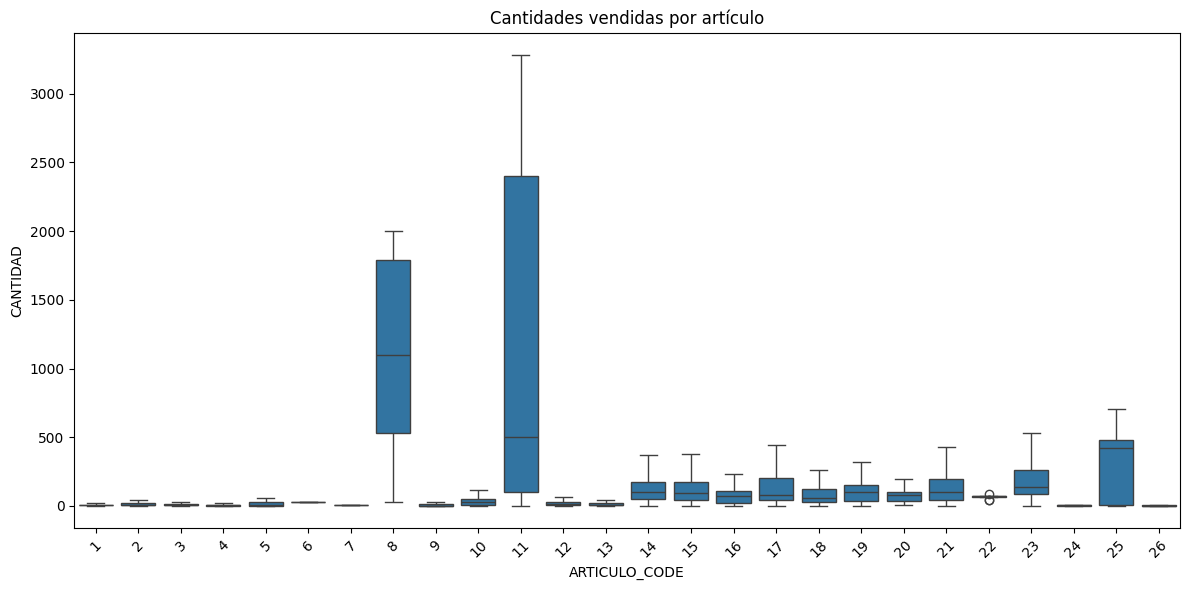

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='ARTICULO_CODE', y='CANTIDAD', data=df2model)
plt.title('Cantidades vendidas por artículo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

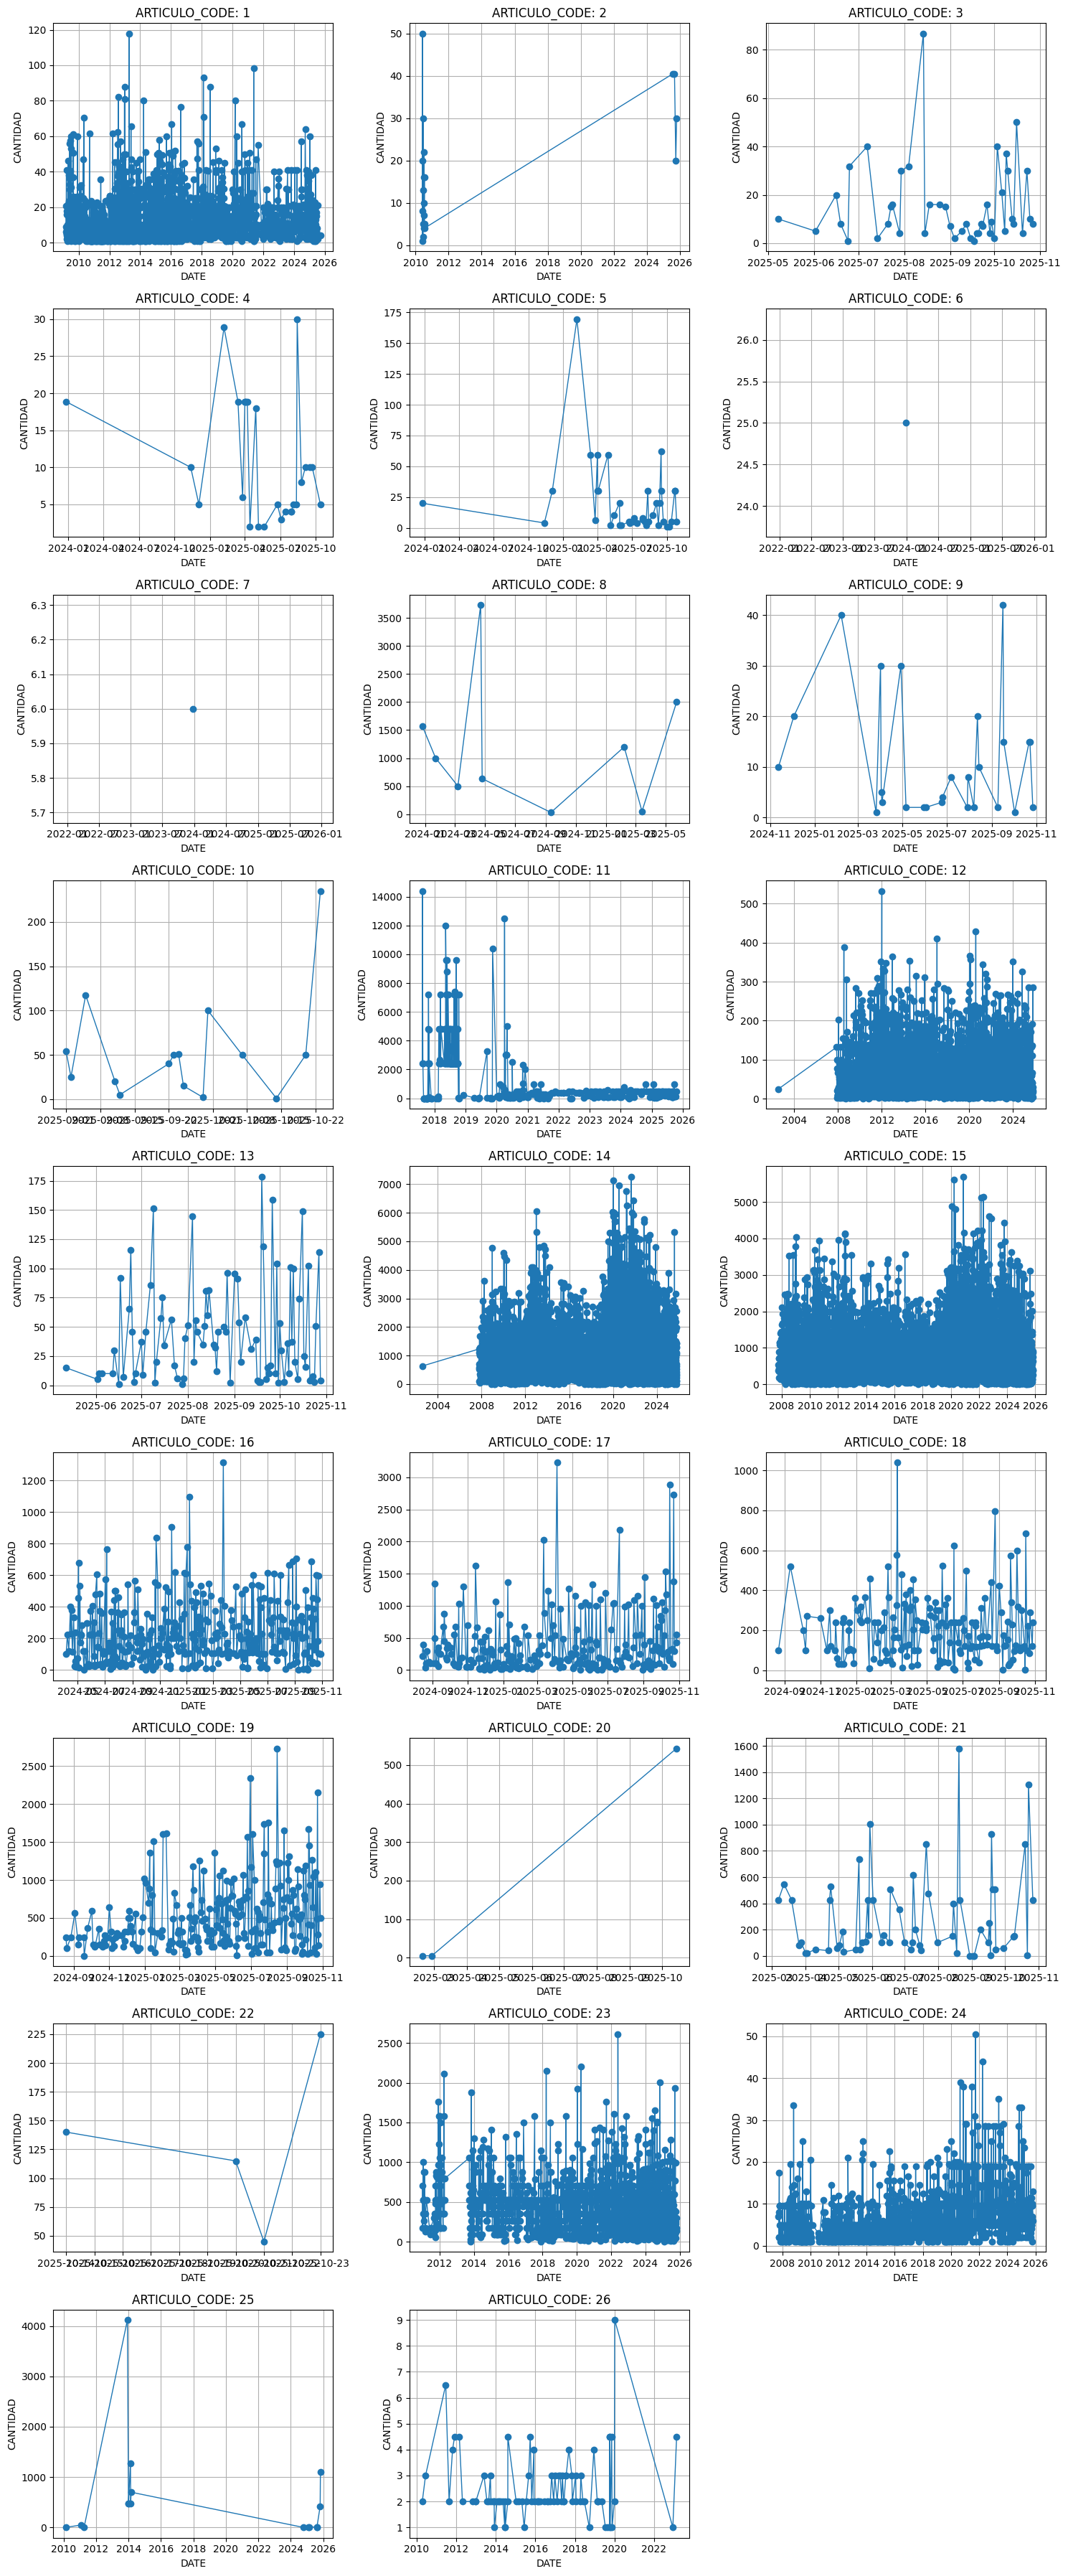

In [39]:

# --------------------------------
# Daily time series
# --------------------------------

# Ensure date is at daily resolution
df2model['DATE'] = df2model['F_EMISION'].dt.floor('D')

ARTICULO_CODEs = df2model['ARTICULO_CODE'].unique()
n3 = len(ARTICULO_CODEs)

# Layout
cols = 3
rows = -(-n3 // cols)  # ceiling division

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

# Plot for each ARTICULO_CODE
for i, articulo in enumerate(ARTICULO_CODEs):

    subset = (
        df2model[df2model['ARTICULO_CODE'] == articulo]
        .groupby('DATE', as_index=False)['CANTIDAD']
        .sum()
    )

    axes[i].plot(
        subset['DATE'],
        subset['CANTIDAD'],
        marker='o',
        linewidth=1
    )

    axes[i].set_title(f'ARTICULO_CODE: {articulo}')
    axes[i].set_xlabel('DATE')
    axes[i].set_ylabel('CANTIDAD')
    axes[i].grid(True)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [40]:
# Keep the grouping keys
group_cols = ['ARTICULO_CODE', 'YEAR', 'MONTH']

# Detect numeric columns automatically
num_cols = df2model.select_dtypes(include='number').columns.tolist()
num_cols = [c for c in num_cols if c not in group_cols]

# Aggregate
df_monthly = (df2model.groupby(group_cols)[num_cols].agg(['sum', 'mean', 'median']).reset_index())

df_monthly


ARTICULO_CODE  YEAR MONTH CNT_PRODS_VENTA                  TIPO_DOC       \
                                           sum      mean median      sum mean   
0                1  2009     3             157      6.28   10.0        0  0.0   
1                1  2009     4             216       7.2   10.0        0  0.0   
2                1  2009     5             179  5.114286    3.0        0  0.0   
3                1  2009     6             146  4.171429    2.0        0  0.0   
4                1  2009     7             115  4.107143    2.0        0  0.0   
...            ...   ...   ...             ...       ...    ...      ...  ...   
1518            26  2019    11               4       2.0    2.0        0  0.0   
1519            26  2019    12              32      16.0   16.0        2  1.0   
1520            26  2020     1              32      16.0   16.0        2  1.0   
1521            26  2022    12               3       3.0    3.0        2  2.0   
1522            26  2023     2               3       3.0    3.0        2  2.0   

            DIAS  ... ROLL_MEAN_6  ROLL_SUM_6                    ROLL_MEAN_12  \
     median  sum  ...      median         sum        mean median          sum   
0       0.0  300  ...    4.916667  4185.75381  167.430152  29.50  1384.319469   
1       0.0  360  ...    5.083333   930.50000   31.016667  30.50   154.541667   
2       0.0  630  ...    3.500000  1032.00000   29.485714  21.00   169.916667   
3       0.0  735  ...    8.333333  1716.00000   49.028571  50.00   268.000000   
4       0.0  570  ...   10.625000  1851.00000   66.107143  63.75   314.750000   
...     ...  ...  ...         ...         ...         ...    ...          ...   
1518    0.0   30  ...    2.458333    29.50000   14.750000  14.75     4.375000   
1519    1.0   60  ...    2.458333    29.50000   14.750000  14.75     4.166667   
1520    1.0   60  ...    2.458333    29.50000   14.750000  14.75     4.708333   
1521    2.0   90  ...    2.750000    16.50000   16.500000  16.50     2.458333   
1522    2.0   15  ...    2.750000    16.50000   16.500000  16.50     2.750000   

                             ROLL_SUM_12                      
           mean     median           sum        mean  median  
0     55.372779   5.708333  16611.833625  664.473345   68.50  
1      5.151389   5.083333   1854.500000   61.816667   61.00  
2      4.854762   5.000000   2039.000000   58.257143   60.00  
3      7.657143   7.791667   3216.000000   91.885714   93.50  
4     11.241071  11.333333   3777.000000  134.892857  136.00  
...         ...        ...           ...         ...     ...  
1518   2.187500   2.187500     52.500000   26.250000   26.25  
1519   2.083333   2.083333     50.000000   25.000000   25.00  
1520   2.354167   2.354167     56.500000   28.250000   28.25  
1521   2.458333   2.458333     29.500000   29.500000   29.50  
1522   2.750000   2.750000     33.000000   33.000000   33.00  

[1523 rows x 63 columns]

In [41]:
df_monthly.dtypes

ARTICULO_CODE                int64
YEAR                         int32
MONTH                        int32
CNT_PRODS_VENTA  sum         Int64
                 mean      Float64
                            ...   
ROLL_MEAN_12     mean      float64
                 median    float64
ROLL_SUM_12      sum       float64
                 mean      float64
                 median    float64
Length: 63, dtype: object

In [42]:
# Flatten the column names

df_monthly.columns = [
    "_".join(col).strip() if isinstance(col, tuple) else col
    for col in df_monthly.columns]

# Remove trailing underscores for group columns
df_monthly = df_monthly.rename(columns={
    'ARTICULO_CODE_': 'ARTICULO_CODE',
    'YEAR_': 'YEAR',
    'MONTH_': 'MONTH'
})

df_monthly


ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
0                 1  2009      3                  157                  6.28   
1                 1  2009      4                  216                   7.2   
2                 1  2009      5                  179              5.114286   
3                 1  2009      6                  146              4.171429   
4                 1  2009      7                  115              4.107143   
...             ...   ...    ...                  ...                   ...   
1518             26  2019     11                    4                   2.0   
1519             26  2019     12                   32                  16.0   
1520             26  2020      1                   32                  16.0   
1521             26  2022     12                    3                   3.0   
1522             26  2023      2                    3                   3.0   

      CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
0                       10.0             0            0.0              0.0   
1                       10.0             0            0.0              0.0   
2                        3.0             0            0.0              0.0   
3                        2.0             0            0.0              0.0   
4                        2.0             0            0.0              0.0   
...                      ...           ...            ...              ...   
1518                     2.0             0            0.0              0.0   
1519                    16.0             2            1.0              1.0   
1520                    16.0             2            1.0              1.0   
1521                     3.0             2            2.0              2.0   
1522                     3.0             2            2.0              2.0   

      DIAS_sum  ...  ROLL_MEAN_6_median  ROLL_SUM_6_sum  ROLL_SUM_6_mean  \
0          300  ...            4.916667      4185.75381       167.430152   
1          360  ...            5.083333       930.50000        31.016667   
2          630  ...            3.500000      1032.00000        29.485714   
3          735  ...            8.333333      1716.00000        49.028571   
4          570  ...           10.625000      1851.00000        66.107143   
...        ...  ...                 ...             ...              ...   
1518        30  ...            2.458333        29.50000        14.750000   
1519        60  ...            2.458333        29.50000        14.750000   
1520        60  ...            2.458333        29.50000        14.750000   
1521        90  ...            2.750000        16.50000        16.500000   
1522        15  ...            2.750000        16.50000        16.500000   

      ROLL_SUM_6_median  ROLL_MEAN_12_sum  ROLL_MEAN_12_mean  \
0                 29.50       1384.319469          55.372779   
1                 30.50        154.541667           5.151389   
2                 21.00        169.916667           4.854762   
3                 50.00        268.000000           7.657143   
4                 63.75        314.750000          11.241071   
...                 ...               ...                ...   
1518              14.75          4.375000           2.187500   
1519              14.75          4.166667           2.083333   
1520              14.75          4.708333           2.354167   
1521              16.50          2.458333           2.458333   
1522              16.50          2.750000           2.750000   

      ROLL_MEAN_12_median  ROLL_SUM_12_sum  ROLL_SUM_12_mean  \
0                5.708333     16611.833625        664.473345   
1                5.083333      1854.500000         61.816667   
2                5.000000      2039.000000         58.257143   
3                7.791667      3216.000000         91.885714   
4               11.333333      3777.000000        134.892857   
...                   ...              ...            

In [43]:
df_monthly.dtypes

ARTICULO_CODE             int64
YEAR                      int32
MONTH                     int32
CNT_PRODS_VENTA_sum       Int64
CNT_PRODS_VENTA_mean    Float64
                         ...   
ROLL_MEAN_12_mean       float64
ROLL_MEAN_12_median     float64
ROLL_SUM_12_sum         float64
ROLL_SUM_12_mean        float64
ROLL_SUM_12_median      float64
Length: 63, dtype: object

También se pueden utilizar métodos de filtrado para la selección de características y técnicas de reducción de dimensionalidad.

La dimensionalidad en este caso no representa un problema, por lo cual no se aplica ninguna técnica de reducción

**CONCLUSIONES:** Enumerar y justificar las decisiones y técnicas empleadas.

---

## **ETAPA IV:** Modelación y evaluación del modelo

En esta etapa se construyen y evalúan varios modelos usando diversos algoritmos. En caso de que los resultados sean deficientes, la metodología permite volver al primer paso para tener una comprensión de lo que está ocurriendo.


Las siguientes son acciones que se pueden abordar en este avance:
* Particionar los datos en conjunto de entrenamiento y conjunto de prueba (SI APLICA).
* Considerar al menos 3 modelos diferentes (con algoritmos variados) o 3 técnicas de modelado.
* Inspeccionar visualmente los resultados del clustering (SI APLICA).
* Sintetizar los resultados en una tabla comparativa ordenando los modelos por la métrica principal (definida en los criterios de éxito) e incorporando otras métricas pertinentes. Se deberán incluir también los tiempos de entrenamiento.
* Elegir el modelo final alineado con los objetivos y necesidades del negocio.
* Ajustar el modelo que proporcione el mejor rendimiento (OPCIONAL)

#### Model

In [44]:
# Particionar los datos en conjunto de entrenamiento y conjunto de prueba

train, test = train_test_split(df_monthly, train_size=0.8, random_state=1) #,random_state=1
print('Train:', len(train), '\n Test:', len(test))


Train: 1218 
 Test: 305


In [45]:
# Input / Output

y = 'CANTIDAD_sum'
x = list(train.columns)
x.remove(y)

x

['ARTICULO_CODE',
 'YEAR',
 'MONTH',
 'CNT_PRODS_VENTA_sum',
 'CNT_PRODS_VENTA_mean',
 'CNT_PRODS_VENTA_median',
 'TIPO_DOC_sum',
 'TIPO_DOC_mean',
 'TIPO_DOC_median',
 'DIAS_sum',
 'DIAS_mean',
 'DIAS_median',
 'VEND_sum',
 'VEND_mean',
 'VEND_median',
 'UNIDAD_sum',
 'UNIDAD_mean',
 'UNIDAD_median',
 'CANTIDAD_mean',
 'CANTIDAD_median',
 'PRECIO_sum',
 'PRECIO_mean',
 'PRECIO_median',
 'TEMPORADA_sum',
 'TEMPORADA_mean',
 'TEMPORADA_median',
 'FESTIVIDAD_sum',
 'FESTIVIDAD_mean',
 'FESTIVIDAD_median',
 'MARCA_CASA_sum',
 'MARCA_CASA_mean',
 'MARCA_CASA_median',
 'LAG_1_sum',
 'LAG_1_mean',
 'LAG_1_median',
 'LAG_3_sum',
 'LAG_3_mean',
 'LAG_3_median',
 'LAG_6_sum',
 'LAG_6_mean',
 'LAG_6_median',
 'LAG_12_sum',
 'LAG_12_mean',
 'LAG_12_median',
 'ROLL_MEAN_3_sum',
 'ROLL_MEAN_3_mean',
 'ROLL_MEAN_3_median',
 'ROLL_SUM_3_sum',
 'ROLL_SUM_3_mean',
 'ROLL_SUM_3_median',
 'ROLL_MEAN_6_sum',
 'ROLL_MEAN_6_mean',
 'ROLL_MEAN_6_median',
 'ROLL_SUM_6_sum',
 'ROLL_SUM_6_mean',
 'ROLL_SUM_6_me

In [46]:
print(train[y].describe(), '\n\n', train[y].nunique())


count      1218.000000
mean       6960.324610
std       10529.740278
min           1.000000
25%          77.125000
50%        1173.500000
75%       13555.750000
max      102450.000000
Name: CANTIDAD_sum, dtype: float64 

 956


In [47]:
from pycaret.regression import *
pyc = setup(data=train, target=y, test_data=test, preprocess=True, session_id=1, fold_strategy='timeseries', data_split_shuffle=False, fold_shuffle=False) 


#### Leader

In [48]:
# Sintetizar los resultados en una tabla comparativa ordenando los modelos por la métrica principal 

leader = compare_models(sort='r2', budget_time=1.5, fold=3) #budget_time=1.5, fold=5, , sort='r2'
leader

LassoLars(random_state=1)

In [49]:
evaluate_model(leader)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Predict

#### Period

In [66]:
# Future periods

last_year  = train['YEAR'].max()
last_month = train[train['YEAR'] == last_year]['MONTH'].max()

# Months to forecast
forecast_horizon = 3  

future_periods = pd.date_range(
    start=f"{last_year}-{last_month}-01", 
    periods=forecast_horizon + 1, 
    freq="MS")[1:]  # skip the last known month

print("Last date in dataset:", last_year, last_month)
future_periods

Last date in dataset: 2025 10


DatetimeIndex(['2025-11-01', '2025-12-01', '2026-01-01'], dtype='datetime64[ns]', freq='MS')

In [92]:
# For each ARTICULO_CODE

future_df = []

for art in train['ARTICULO_CODE'].unique():
    for dt in future_periods:
        future_df.append({
            'ARTICULO_CODE': art,
            'YEAR': dt.year,
            'MONTH': dt.month
        })

future_df = pd.DataFrame(future_df)
future_df.tail()

ARTICULO_CODE  YEAR  MONTH
70             22  2025     12
71             22  2026      1
72             10  2025     11
73             10  2025     12
74             10  2026      1

In [93]:
full_df = pd.concat([df_monthly, future_df], ignore_index=True)
full_df = full_df.sort_values(['ARTICULO_CODE', 'YEAR', 'MONTH'])

full_df.tail()

ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
1521             26  2022     12                    3                   3.0   
1522             26  2023      2                    3                   3.0   
1529             26  2025     11                 <NA>                  <NA>   
1530             26  2025     12                 <NA>                  <NA>   
1531             26  2026      1                 <NA>                  <NA>   

      CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
1521                     3.0           2.0            2.0              2.0   
1522                     3.0           2.0            2.0              2.0   
1529                    <NA>           NaN            NaN              NaN   
1530                    <NA>           NaN            NaN              NaN   
1531                    <NA>           NaN            NaN              NaN   

      DIAS_sum  ...  ROLL_MEAN_6_median  ROLL_SUM_6_sum  ROLL_SUM_6_mean  \
1521        90  ...                2.75            16.5             16.5   
1522        15  ...                2.75            16.5             16.5   
1529      <NA>  ...                 NaN             NaN              NaN   
1530      <NA>  ...                 NaN             NaN              NaN   
1531      <NA>  ...                 NaN             NaN              NaN   

      ROLL_SUM_6_median  ROLL_MEAN_12_sum  ROLL_MEAN_12_mean  \
1521               16.5          2.458333           2.458333   
1522               16.5          2.750000           2.750000   
1529                NaN               NaN                NaN   
1530                NaN               NaN                NaN   
1531                NaN               NaN                NaN   

      ROLL_MEAN_12_median  ROLL_SUM_12_sum  ROLL_SUM_12_mean  \
1521             2.458333             29.5              29.5   
1522             2.750000             33.0              33.0   
1529                  NaN              NaN               NaN   
1530                  NaN              NaN               NaN   
1531                  NaN              NaN               NaN   

      ROLL_SUM_12_median  
1521                29.5  
1522                33.0  
1529                 NaN  
1530                 NaN  
1531                 NaN  

[5 rows x 63 columns]

In [94]:
full_df.dtypes

ARTICULO_CODE             int64
YEAR                      int64
MONTH                     int64
CNT_PRODS_VENTA_sum       Int64
CNT_PRODS_VENTA_mean    Float64
                         ...   
ROLL_MEAN_12_mean       float64
ROLL_MEAN_12_median     float64
ROLL_SUM_12_sum         float64
ROLL_SUM_12_mean        float64
ROLL_SUM_12_median      float64
Length: 63, dtype: object

#### Missing features

In [95]:
# Missing features

# Temporada del año en que se realiza la venta
def get_season(date):
    month = date
    if month in [3, 4, 5]:
        return 1  #Primavera
    elif month in [6, 7, 8]:
        return 2  #Verano
    elif month in [9, 10, 11]:
        return 3  #Otoño
    else:
        return 4  #Invierno

full_df['TEMPORADA'] = full_df['MONTH'].apply(get_season)
print('Temporadas: ', len(full_df['TEMPORADA'].unique()), '\n', full_df['TEMPORADA'].unique().tolist())
full_df.head()


Temporadas:  4 
 [1, 2, 3, 4]


ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
0              1  2009      3                  157                  6.28   
1              1  2009      4                  216                   7.2   
2              1  2009      5                  179              5.114286   
3              1  2009      6                  146              4.171429   
4              1  2009      7                  115              4.107143   

   CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
0                    10.0           0.0            0.0              0.0   
1                    10.0           0.0            0.0              0.0   
2                     3.0           0.0            0.0              0.0   
3                     2.0           0.0            0.0              0.0   
4                     2.0           0.0            0.0              0.0   

   DIAS_sum  ...  ROLL_SUM_6_sum  ROLL_SUM_6_mean  ROLL_SUM_6_median  \
0       300  ...      4185.75381       167.430152              29.50   
1       360  ...       930.50000        31.016667              30.50   
2       630  ...      1032.00000        29.485714              21.00   
3       735  ...      1716.00000        49.028571              50.00   
4       570  ...      1851.00000        66.107143              63.75   

   ROLL_MEAN_12_sum  ROLL_MEAN_12_mean  ROLL_MEAN_12_median  ROLL_SUM_12_sum  \
0       1384.319469          55.372779             5.708333     16611.833625   
1        154.541667           5.151389             5.083333      1854.500000   
2        169.916667           4.854762             5.000000      2039.000000   
3        268.000000           7.657143             7.791667      3216.000000   
4        314.750000          11.241071            11.333333      3777.000000   

   ROLL_SUM_12_mean  ROLL_SUM_12_median  TEMPORADA  
0        664.473345                68.5          1  
1         61.816667                61.0          1  
2         58.257143                60.0          1  
3         91.885714                93.5          2  
4        134.892857               136.0          2  

[5 rows x 64 columns]

In [96]:
# Festividades con pan característico
def holiday(date):
    month = date
    
    if month in [9, 11, 12]:
        return 1 #Yes
    else:
        return 0 #No


full_df['FESTIVIDAD'] = full_df['MONTH'].apply(holiday)

print('Festividades: ', len(full_df['FESTIVIDAD'].unique()), '\n', full_df['FESTIVIDAD'].unique().tolist())
full_df.head()

Festividades:  2 
 [0, 1]


ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
0              1  2009      3                  157                  6.28   
1              1  2009      4                  216                   7.2   
2              1  2009      5                  179              5.114286   
3              1  2009      6                  146              4.171429   
4              1  2009      7                  115              4.107143   

   CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
0                    10.0           0.0            0.0              0.0   
1                    10.0           0.0            0.0              0.0   
2                     3.0           0.0            0.0              0.0   
3                     2.0           0.0            0.0              0.0   
4                     2.0           0.0            0.0              0.0   

   DIAS_sum  ...  ROLL_SUM_6_mean  ROLL_SUM_6_median  ROLL_MEAN_12_sum  \
0       300  ...       167.430152              29.50       1384.319469   
1       360  ...        31.016667              30.50        154.541667   
2       630  ...        29.485714              21.00        169.916667   
3       735  ...        49.028571              50.00        268.000000   
4       570  ...        66.107143              63.75        314.750000   

   ROLL_MEAN_12_mean  ROLL_MEAN_12_median  ROLL_SUM_12_sum  ROLL_SUM_12_mean  \
0          55.372779             5.708333     16611.833625        664.473345   
1           5.151389             5.083333      1854.500000         61.816667   
2           4.854762             5.000000      2039.000000         58.257143   
3           7.657143             7.791667      3216.000000         91.885714   
4          11.241071            11.333333      3777.000000        134.892857   

   ROLL_SUM_12_median  TEMPORADA  FESTIVIDAD  
0                68.5          1           0  
1                61.0          1           0  
2                60.0          1           0  
3                93.5          2           0  
4               136.0          2           0  

[5 rows x 65 columns]

reverse_mapping


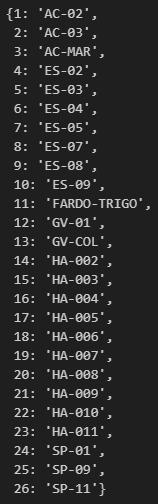

In [97]:
#Invert original dictionary
inverted = {v: k for k, v in reverse_mapping.items()}

marcas_busqueda = ['HA-002', 'HA-004', 'HA-003', 'FARDO-TRIGO', 'HA-011'] 
keys = [inverted[marcas_busqueda] for marcas_busqueda in marcas_busqueda]
print(keys)


[14, 16, 15, 11, 23]


In [98]:
# Señalar marcas propias (primera opción a promocionar)

full_df['MARCA_CASA'] = full_df['ARTICULO_CODE'].isin(marcas_busqueda).astype(int)

full_df.tail()


ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
1521             26  2022     12                    3                   3.0   
1522             26  2023      2                    3                   3.0   
1529             26  2025     11                 <NA>                  <NA>   
1530             26  2025     12                 <NA>                  <NA>   
1531             26  2026      1                 <NA>                  <NA>   

      CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
1521                     3.0           2.0            2.0              2.0   
1522                     3.0           2.0            2.0              2.0   
1529                    <NA>           NaN            NaN              NaN   
1530                    <NA>           NaN            NaN              NaN   
1531                    <NA>           NaN            NaN              NaN   

      DIAS_sum  ...  ROLL_SUM_6_median  ROLL_MEAN_12_sum  ROLL_MEAN_12_mean  \
1521        90  ...               16.5          2.458333           2.458333   
1522        15  ...               16.5          2.750000           2.750000   
1529      <NA>  ...                NaN               NaN                NaN   
1530      <NA>  ...                NaN               NaN                NaN   
1531      <NA>  ...                NaN               NaN                NaN   

      ROLL_MEAN_12_median  ROLL_SUM_12_sum  ROLL_SUM_12_mean  \
1521             2.458333             29.5              29.5   
1522             2.750000             33.0              33.0   
1529                  NaN              NaN               NaN   
1530                  NaN              NaN               NaN   
1531                  NaN              NaN               NaN   

      ROLL_SUM_12_median  TEMPORADA  FESTIVIDAD  MARCA_CASA  
1521                29.5          4           1           0  
1522                33.0          4           0           0  
1529                 NaN          3           1           0  
1530                 NaN          4           1           0  
1531                 NaN          4           0           0  

[5 rows x 66 columns]

In [99]:
# LAG Features

full_df = full_df.sort_values(['ARTICULO_CODE', 'YEAR', 'MONTH'])
lags = [1, 3, 6, 12]

for lag in lags:
    full_df[f"LAG_{lag}"] = full_df.groupby('ARTICULO_CODE')['CANTIDAD_sum'].shift(lag).transform(lambda x: x.fillna(x.mean()))

full_df.tail()

ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
1521             26  2022     12                    3                   3.0   
1522             26  2023      2                    3                   3.0   
1529             26  2025     11                 <NA>                  <NA>   
1530             26  2025     12                 <NA>                  <NA>   
1531             26  2026      1                 <NA>                  <NA>   

      CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
1521                     3.0           2.0            2.0              2.0   
1522                     3.0           2.0            2.0              2.0   
1529                    <NA>           NaN            NaN              NaN   
1530                    <NA>           NaN            NaN              NaN   
1531                    <NA>           NaN            NaN              NaN   

      DIAS_sum  ...  ROLL_SUM_12_sum  ROLL_SUM_12_mean  ROLL_SUM_12_median  \
1521        90  ...             29.5              29.5                29.5   
1522        15  ...             33.0              33.0                33.0   
1529      <NA>  ...              NaN               NaN                 NaN   
1530      <NA>  ...              NaN               NaN                 NaN   
1531      <NA>  ...              NaN               NaN                 NaN   

      TEMPORADA  FESTIVIDAD  MARCA_CASA       LAG_1  LAG_3  LAG_6  LAG_12  
1521          4           1           0     9.00000    5.5    1.0     2.0  
1522          4           0           0     1.00000    2.0    1.0     1.0  
1529          3           1           0     4.50000    9.0   11.0     4.0  
1530          4           1           0  6970.57252    1.0    5.5     4.0  
1531          4           0           0  6970.57252    4.5    2.0     2.0  

[5 rows x 70 columns]

In [100]:
# Rolling features

full_df = full_df.sort_values(['ARTICULO_CODE', 'YEAR', 'MONTH'])

rolling_windows = [3, 6, 12]

for window in rolling_windows:
    full_df[f"ROLL_MEAN_{window}"] = (full_df.groupby('ARTICULO_CODE')['CANTIDAD_sum'].rolling(window).mean().reset_index(level=0, drop=True)).transform(lambda x: x.fillna(x.mean()))
    full_df[f"ROLL_SUM_{window}"] = (full_df.groupby('ARTICULO_CODE')['CANTIDAD_sum'].rolling(window).sum().reset_index(level=0, drop=True)).transform(lambda x: x.fillna(x.mean()))

full_df.tail()

ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
1521             26  2022     12                    3                   3.0   
1522             26  2023      2                    3                   3.0   
1529             26  2025     11                 <NA>                  <NA>   
1530             26  2025     12                 <NA>                  <NA>   
1531             26  2026      1                 <NA>                  <NA>   

      CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
1521                     3.0           2.0            2.0              2.0   
1522                     3.0           2.0            2.0              2.0   
1529                    <NA>           NaN            NaN              NaN   
1530                    <NA>           NaN            NaN              NaN   
1531                    <NA>           NaN            NaN              NaN   

      DIAS_sum  ...       LAG_1  LAG_3  LAG_6  LAG_12  ROLL_MEAN_3  \
1521        90  ...     9.00000    5.5    1.0     2.0     4.000000   
1522        15  ...     1.00000    2.0    1.0     1.0     4.833333   
1529      <NA>  ...     4.50000    9.0   11.0     4.0  7116.879438   
1530      <NA>  ...  6970.57252    1.0    5.5     4.0  7116.879438   
1531      <NA>  ...  6970.57252    4.5    2.0     2.0  7116.879438   

        ROLL_SUM_3  ROLL_MEAN_6    ROLL_SUM_6  ROLL_MEAN_12   ROLL_SUM_12  
1521     12.000000     4.916667     29.500000      3.625000     43.500000  
1522     14.500000     5.500000     33.000000      3.916667     47.000000  
1529  21350.638314  7297.231175  43783.387048   7551.098094  90613.177123  
1530  21350.638314  7297.231175  43783.387048   7551.098094  90613.177123  
1531  21350.638314  7297.231175  43783.387048   7551.098094  90613.177123  

[5 rows x 76 columns]

In [101]:
full_df.columns

Index(['ARTICULO_CODE', 'YEAR', 'MONTH', 'CNT_PRODS_VENTA_sum',
       'CNT_PRODS_VENTA_mean', 'CNT_PRODS_VENTA_median', 'TIPO_DOC_sum',
       'TIPO_DOC_mean', 'TIPO_DOC_median', 'DIAS_sum', 'DIAS_mean',
       'DIAS_median', 'VEND_sum', 'VEND_mean', 'VEND_median', 'UNIDAD_sum',
       'UNIDAD_mean', 'UNIDAD_median', 'CANTIDAD_sum', 'CANTIDAD_mean',
       'CANTIDAD_median', 'PRECIO_sum', 'PRECIO_mean', 'PRECIO_median',
       'TEMPORADA_sum', 'TEMPORADA_mean', 'TEMPORADA_median', 'FESTIVIDAD_sum',
       'FESTIVIDAD_mean', 'FESTIVIDAD_median', 'MARCA_CASA_sum',
       'MARCA_CASA_mean', 'MARCA_CASA_median', 'LAG_1_sum', 'LAG_1_mean',
       'LAG_1_median', 'LAG_3_sum', 'LAG_3_mean', 'LAG_3_median', 'LAG_6_sum',
       'LAG_6_mean', 'LAG_6_median', 'LAG_12_sum', 'LAG_12_mean',
       'LAG_12_median', 'ROLL_MEAN_3_sum', 'ROLL_MEAN_3_mean',
       'ROLL_MEAN_3_median', 'ROLL_SUM_3_sum', 'ROLL_SUM_3_mean',
       'ROLL_SUM_3_median', 'ROLL_MEAN_6_sum', 'ROLL_MEAN_6_mean',
       'ROLL_ME

In [102]:
X_train = get_config("X_train")
train_features = X_train.columns.tolist()

final_model = finalize_model(leader)

df2pred_future = full_df.copy()
#df2pred_future['F_EMISION'] = df2pred_future['F_EMISION'].fillna(df2pred_future['DATE'])
df2pred_future = df2pred_future.drop(columns=['CANTIDAD_sum']) #'DATE', 

for col in train_features:
    if col not in df2pred_future.columns:
        df2pred_future[col] = 0

df2pred_future


ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
0                 1  2009      3                  157                  6.28   
1                 1  2009      4                  216                   7.2   
2                 1  2009      5                  179              5.114286   
3                 1  2009      6                  146              4.171429   
4                 1  2009      7                  115              4.107143   
...             ...   ...    ...                  ...                   ...   
1521             26  2022     12                    3                   3.0   
1522             26  2023      2                    3                   3.0   
1529             26  2025     11                 <NA>                  <NA>   
1530             26  2025     12                 <NA>                  <NA>   
1531             26  2026      1                 <NA>                  <NA>   

      CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
0                       10.0           0.0            0.0              0.0   
1                       10.0           0.0            0.0              0.0   
2                        3.0           0.0            0.0              0.0   
3                        2.0           0.0            0.0              0.0   
4                        2.0           0.0            0.0              0.0   
...                      ...           ...            ...              ...   
1521                     3.0           2.0            2.0              2.0   
1522                     3.0           2.0            2.0              2.0   
1529                    <NA>           NaN            NaN              NaN   
1530                    <NA>           NaN            NaN              NaN   
1531                    <NA>           NaN            NaN              NaN   

      DIAS_sum  ...       LAG_1       LAG_3        LAG_6       LAG_12  \
0          300  ...  6970.57252  6970.57252  7136.424381  7425.630979   
1          360  ...   141.50000  6970.57252  7136.424381  7425.630979   
2          630  ...   142.00000  6970.57252  7136.424381  7425.630979   
3          735  ...   170.50000   141.50000  7136.424381  7425.630979   
4          570  ...   306.00000   142.00000  7136.424381  7425.630979   
...        ...  ...         ...         ...          ...          ...   
1521        90  ...     9.00000     5.50000     1.000000     2.000000   
1522        15  ...     1.00000     2.00000     1.000000     1.000000   
1529      <NA>  ...     4.50000     9.00000    11.000000     4.000000   
1530      <NA>  ...  6970.57252     1.00000     5.500000     4.000000   
1531      <NA>  ...  6970.57252     4.50000     2.000000     2.000000   

      ROLL_MEAN_3    ROLL_SUM_3  ROLL_MEAN_6    ROLL_SUM_6  ROLL_MEAN_12  \
0     7116.879438  21350.638314  7297.231175  43783.387048   7551.098094   
1     7116.879438  21350.638314  7297.231175  43783.387048   7551.098094   
2      151.333333    454.000000  7297.231175  43783.387048   7551.098094   
3      206.166667    618.500000  7297.231175  43783.387048   7551.098094   
4      256.333333    769.000000  7297.231175  43783.387048   7551.098094   
...           ...           ...          ...           ...           ...   
1521     4.000000     12.000000     4.916667     29.500000      3.625000   
1522     4.833333     14.500000     5.500000     33.000000      3.916667   
1529  7116.879438  21350.638314  7297.231175  43783.387048   7551.098094   
1530  7116.879438  21350.638314  7297.231175  43783.387048   7551.098094   
1531  7116.879438  21350.638314  7297.231175  43783.387048   7551.098094   

       ROLL_SUM_12  
0     90613.177123  
1     90613.177123  
2     90613.177123  
3     90613.177123  
4     90613.177123  
...            ...  
1521     43.500000  
1522     47.000000  
1529  90613.177123  
1530  90613.177123  
1531  90613.177123  

[1598 rows x 75 columns]

#### df2pred_future

In [103]:
# Prediction with trained model

preds = predict_model(final_model, data=df2pred_future)
preds[['ARTICULO_CODE','YEAR','MONTH','prediction_label']]


ARTICULO_CODE  YEAR  MONTH  prediction_label
0                 1  2009      3        336.761959
1                 1  2009      4        131.883065
2                 1  2009      5        179.363214
3                 1  2009      6        310.805637
4                 1  2009      7        305.844087
...             ...   ...    ...               ...
1521             26  2022     12          6.530474
1522             26  2023      2          3.355663
1529             26  2025     11       6969.937338
1530             26  2025     12       6969.724230
1531             26  2026      1       6971.386050

[1598 rows x 4 columns]

In [104]:
# ARTICULO & DESCRIP

preds["ARTICULO"] = preds["ARTICULO_CODE"].map(reverse_mapping).fillna("UNKNOWN")
art_desc = transformed_df[['ARTICULO', 'DESCRIP']].drop_duplicates()
preds = preds.merge(art_desc, on='ARTICULO', how='left')

preds

ARTICULO_CODE  YEAR  MONTH  CNT_PRODS_VENTA_sum  CNT_PRODS_VENTA_mean  \
0                 1  2009      3                  157                  6.28   
1                 1  2009      4                  216                   7.2   
2                 1  2009      5                  179              5.114286   
3                 1  2009      6                  146              4.171429   
4                 1  2009      7                  115              4.107143   
...             ...   ...    ...                  ...                   ...   
1593             26  2022     12                    3                   3.0   
1594             26  2023      2                    3                   3.0   
1595             26  2025     11                 <NA>                  <NA>   
1596             26  2025     12                 <NA>                  <NA>   
1597             26  2026      1                 <NA>                  <NA>   

      CNT_PRODS_VENTA_median  TIPO_DOC_sum  TIPO_DOC_mean  TIPO_DOC_median  \
0                       10.0           0.0            0.0              0.0   
1                       10.0           0.0            0.0              0.0   
2                        3.0           0.0            0.0              0.0   
3                        2.0           0.0            0.0              0.0   
4                        2.0           0.0            0.0              0.0   
...                      ...           ...            ...              ...   
1593                     3.0           2.0            2.0              2.0   
1594                     3.0           2.0            2.0              2.0   
1595                    <NA>           NaN            NaN              NaN   
1596                    <NA>           NaN            NaN              NaN   
1597                    <NA>           NaN            NaN              NaN   

      DIAS_sum  ...       LAG_12  ROLL_MEAN_3    ROLL_SUM_3  ROLL_MEAN_6  \
0          300  ...  7425.630859  7116.879395  21350.638672  7297.230957   
1          360  ...  7425.630859  7116.879395  21350.638672  7297.230957   
2          630  ...  7425.630859   151.333328    454.000000  7297.230957   
3          735  ...  7425.630859   206.166672    618.500000  7297.230957   
4          570  ...  7425.630859   256.333344    769.000000  7297.230957   
...        ...  ...          ...          ...           ...          ...   
1593        90  ...     2.000000     4.000000     12.000000     4.916667   
1594        15  ...     1.000000     4.833333     14.500000     5.500000   
1595      <NA>  ...     4.000000  7116.879395  21350.638672  7297.230957   
1596      <NA>  ...     4.000000  7116.879395  21350.638672  7297.230957   
1597      <NA>  ...     2.000000  7116.879395  21350.638672  7297.230957   

        ROLL_SUM_6  ROLL_MEAN_12   ROLL_SUM_12  prediction_label  ARTICULO  \
0     43783.386719   7551.098145  90613.179688        336.761959     AC-02   
1     43783.386719   7551.098145  90613.179688        131.883065     AC-02   
2     43783.386719   7551.098145  90613.179688        179.363214     AC-02   
3     43783.386719   7551.098145  90613.179688        310.805637     AC-02   
4     43783.386719   7551.098145  90613.179688        305.844087     AC-02   
...            ...           ...           ...               ...       ...   
1593     29.500000      3.625000     43.500000          6.530474     SP-11   
1594     33.000000      3.916667     47.000000          3.355663     SP-11   
1595  43783.386719   7551.098145  90613.179688       6969.937338     SP-11   
1596  43783.386719   7551.098145  90613.179688       6969.724230     SP-11   
1597  43783.386719   7551.098145  90613.179688       6971.386050     SP-11   

                    DESCRIP  
0     ACEITE ESTAMPA 20 LTS  
1     ACEITE ESTAMPA 20 LTS  
2     ACEITE ESTAMPA 20 LTS  
3     ACEITE ESTAMPA 20 LTS  
4     ACEITE ESTAMPA 20 LTS  
...                     ...  
1593          SALVADO 30 KG  
1594          SALVADO 30 KG  


In [105]:
y_hat = preds.copy()
y_hat = y_hat.rename(columns={'prediction_label': 'CANTIDAD'})
y_hat = y_hat[(y_hat['YEAR'] > last_year) | ((y_hat['YEAR'] == last_year) & (y_hat['MONTH'] > last_month))].copy()
y_hat = y_hat[['YEAR', 'MONTH', 'ARTICULO_CODE', 'ARTICULO', 'DESCRIP', 'CANTIDAD']]

y_hat

YEAR  MONTH  ARTICULO_CODE ARTICULO                           DESCRIP  \
195   2025     11              1    AC-02             ACEITE ESTAMPA 20 LTS   
196   2025     12              1    AC-02             ACEITE ESTAMPA 20 LTS   
197   2026      1              1    AC-02             ACEITE ESTAMPA 20 LTS   
204   2025     11              2    AC-03  ACEITE MARCA LA NIÃ‘A DE 20 LTS.   
205   2025     12              2    AC-03  ACEITE MARCA LA NIÃ‘A DE 20 LTS.   
...    ...    ...            ...      ...                               ...   
1528  2025     12             25    SP-09                     SALVADO 25 KG   
1529  2026      1             25    SP-09                     SALVADO 25 KG   
1595  2025     11             26    SP-11                     SALVADO 30 KG   
1596  2025     12             26    SP-11                     SALVADO 30 KG   
1597  2026      1             26    SP-11                     SALVADO 30 KG   

         CANTIDAD  
195   6947.837704  
196   6947.624596  
197   6949.286416  
204   6948.721689  
205   6948.508581  
...           ...  
1528  6968.840245  
1529  6970.502065  
1595  6969.937338  
1596  6969.724230  
1597  6971.386050  

[75 rows x 6 columns]

In [110]:

y_hat_agg = (
    y_hat[['ARTICULO_CODE', 'ARTICULO', 'DESCRIP', 'CANTIDAD']]
    .groupby(['ARTICULO_CODE', 'ARTICULO', 'DESCRIP'], as_index=False)
    .agg({'CANTIDAD': 'sum'})
)

y_hat_agg



ARTICULO_CODE     ARTICULO                           DESCRIP      CANTIDAD
0               1        AC-02             ACEITE ESTAMPA 20 LTS  20844.748715
1               2        AC-03  ACEITE MARCA LA NIÃ‘A DE 20 LTS.  20847.400672
2               3       AC-MAR            ACEITE MARAVILLA 20LTS  20850.052628
3               4        ES-02                RICHCREME VAINILLA  20852.704584
4               5        ES-03               RICHCREME CHOCOLATE  20855.356540
5               7        ES-05                        RED VELVET  20860.660452
6               8        ES-07                HARINA ESCUDO PLUS  20863.312408
7               9        ES-08            RICHCREME PIÃ‘A COLADA  20865.964365
8              10        ES-09                 MIX MUERTO 20 KGS  20868.616321
9              11  FARDO-TRIGO  FARDO DE HARINA "LAZIALI" 10 KGS  20871.268277
10             12        GV-01                 GRASA JEFA 24 KGS  20873.920233
11             13       GV-COL                GRASA COLON 24 KGS  20876.572189
12             14       HA-002           HARINA ESMERALDA 25 KGS  20879.224145
13             15       HA-003               HARINA TRECE 25 KGS  20881.876101
14             16       HA-004        HARINA ESMERALDA AP 25 KGS  20884.528058
15             17       HA-005              HARINA ESPIGA 25 KGS  20887.180014
16             18       HA-006             HARINA SELECTA 25 KGS  20889.831970
17             19       HA-007          HARINA SELECTA AP 25 KGS  20892.483926
18             20       HA-008          HARINA XALEY AP 25 KILOS  20895.135882
19             21       HA-009         HARINA GUADALUPANA 25 KGS  20897.787838
20             22       HA-010       HARINA MEDALLA DE ORO 25KGS  20900.439794
21             23       HA-011            HARINA VIRGINIA 25 KGS  20903.091751
22             24        SP-01                      GRANO 25 KGS  20905.743707
23             25        SP-09                     SALVADO 25 KG  20908.395663
24             26        SP-11                     SALVADO 30 KG  20911.047619

#### Export

In [111]:

# --- Export your dataframe ---
y_hat_agg.to_excel("y_hat.xlsx", index=False)

# --- Load workbook ---
wb = load_workbook("y_hat.xlsx")
ws = wb.active

# --- Identify the range of the table ---
max_row = ws.max_row
max_col = ws.max_column

# Convert column number → Excel letters (A, B, C…)
end_col = get_column_letter(max_col)
table_range = f"A1:{end_col}{max_row}"

# --- Create the table ---
table = Table(displayName="PredictionTable", ref=table_range)

# Optional: add a nice style
style = TableStyleInfo(
    name="TableStyleMedium9",
    showFirstColumn=False,
    showLastColumn=False,
    showRowStripes=True,
    showColumnStripes=False
)
table.tableStyleInfo = style

# Add table to worksheet
ws.add_table(table)

# Save it
wb.save("y_hat.xlsx")


**CONCLUSIONES**: ¿El rendimiento del modelo es lo suficientemente bueno para su implementación en producción? ¿Existe margen para mejorarlo? ¿Cuáles serían las recomendaciones clave para poder implementar la solución?

---